In [1]:
#!pip install jyquickhelper
#Pour la table des matières
from jyquickhelper import add_notebook_menu

#Pour les api et données requetables
import requests

####################################################Les packages nécessaires###################################################
import pandas as pd
# Import seaborn
import seaborn as sns
#default theme
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
################################################################################################################################

#Pour afficher toutes les colonnes des bases de données 
pd.set_option('display.max_columns', None)
add_notebook_menu()

In [2]:
#Ajout de ligne

## <center>1. Importation des données</center>

In [3]:
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

### 1.2 Vœux de poursuite d'études et de réorientation dans l'enseignement supérieur et réponses des établissements



https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/information/

###### On a 12760 lignes d'individus et l'Api ne permet pas de récupérer plus de 10 000 lignes et donc on a troué comme astuce de récupérer selon le type de l'établissement avant de merger les bases


In [4]:
#Segmentation pour pouvoir tout récupérer car l'API n'autorise pas plus de 10 000 lignes 
type_etablissement = ["2_Lyc%C3%A9es", "1_Universit%C3%A9s", "3_Autres+formations"]


In [5]:
#Le lien de récupération
voeux_poursuite = glob_path+"fr-esr-parcoursup&rows=6020&sort=tri&facet=session&facet=contrat_etab&facet=cod_uai&facet=g_ea_lib_vx&facet=dep_lib&facet=region_etab_aff&facet=acad_mies&facet=select_form&facet=fili&facet=form_lib_voe_acc&facet=regr_forma&facet=fil_lib_voe_acc&facet=detail_forma&facet=tri&facet=cod_aff_form&q="


In [6]:
#Récupération selon le type d'établissement
data_etablissement = [requests.get(voeux_poursuite + type_etablissement[x]) for x in range(3)]

In [7]:
#Vérification
data_etablissement

[<Response [200]>, <Response [200]>, <Response [200]>]

In [8]:
#Conversion de json à pd.Dataframe
data_etablissement = [pd.json_normalize(x.json()['records'][:]) for x in data_etablissement ]

In [9]:
glob_data = pd.concat(data_etablissement)
glob_data.columns = [c.replace('fields.', '') for c in list(glob_data.columns) ]

### Fouille des données et Statistiques descriptives 

In [10]:
glob_data.shape[1]

120

In [11]:
df = glob_data.copy()


In [72]:
names = {'session' : 'session' ,
        'cod_uai' : 'Identifiant del_établissement' , 
        'g_ea_lib_vx' : 'Identifiant del_établissement' , 
        'dep' : 'code département al del_établisseme nt' , 
        'dep_lib' : 'département de l_établissement' , 
        'region_etab_aff' : 'Région de l_établissement' , 
        'acad_mies' : 'académie de l_établissement' , 
        'fili':'filière de formation très agrégée',
        'contrat_etab':'statut de l_établisseme nt de la filière de formation(public, privé…)', 
        'lib_for_voe_ins':'filière deformation', 
        'select_form':'select_fromat : prend 1 si la formation est sélective, 0 sinon',
        'lib_comp_voe_ins':'filière de formation détaillée', 
        'detail_forma':'filière de formationtrès détaillée', 
        'lien_form_psup':'lien de la formation sur la plateforme parcoursup', 
        'géolocalisation_ des_formations':'coordonnées gps de la formation', 
        'capa_fin':'capacité de l_établisseme nt parformation', 
        'voe_tot':'Effectif total des candidatspour une formation', 
        'voe_tot_f':'dont effectif des candidatespour une formation', 

  'nb_voe_pp' : 'Effectif total des candidats en phaseprincipale' ,  
  'nb_voe_pp_internat' : 'Effectif total des candidats ayant postulé en internat' ,  
  'nb_voe_pp_bg' : 'Effectif des candidats en terminale générale en phase principale' ,  
  'nb_voe_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale en phase principale' ,  
  'nb_voe_pp_bt' : 'Effectif des candidats néo en terminale technologique en phase principale' ,  
  'nb_voe_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e en phaseprincipale' ,  
  'nb_voe_pp_bp' : 'Effectif des candidats néo bacheliers en terminalepro en phase principale' ,  
  'nb_voe_pp_bp_brs' : 'dont effectif des candidats boursiers néo bacheliers en terminale pro en phaseprincipale' ,  
  'nb_voe_pp_at' : 'Effectif des autres candidats en phaseprincipale' ,  
  'nb_voe_pc' : 'Effectif total des candidats en phasecomplément aire' ,  
'nb_voe_pc_bg' : 'Effectif des candidats en terminale générale en' ,
  '' : 'phase complémentaire' ,  
  'nb_voe_pc_bt' : 'Effectif des candidats en terminale technologiqu e en phase complémentaire' ,  
  'nb_voe_pc_bp' : 'Effectif des candidats en terminale pro en phase complémentaire' ,  
  'nb_voe_pc_at' : 'Effectifs des autres candidats en phase complémentaire' ,  
  'nb_cla_pp' : 'Effectif total des candidats classés par l_établisseme nt en phaseprincipale' ,  
  'nb_cla_pc' : 'Effectif des candidats classés par l_établisseme nt en phase complémentaire' ,  
  'nb_cla_pp_internat' : 'Effectif des candidats classés par l_établisseme nt en internatcpgE' ,  
  'nb_cla_pp_pasinternat' : 'Effectif des candidats classés par l_établisseme nt hors internat(cpgE)' ,  
  'nb_cla_pp_bg' : 'Effectif des candidats en terminale générale classés parl_établisseme nt' ,  
  'nb_cla_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale classés par l_établissement' ,  
  'nb_cla_pp_bt' : 'Effectif des candidats en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bp' : 'Effectif des candidats en terminale pro classés par l_établissement' ,  
  'nb_cla_pp_bp_brs' : 'dont effectif des candidats boursiers en terminale pro classés parl_établisseme nt' ,  
  'nb_cla_pp_at' : 'Effectif des autres candidats classés parl_établisseme nt' ,  
  'prop_tot' : 'Effectif total des candidats ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bg' : 'Effectif des candidats en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bg_brs' : 'dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bt' : 'Effectif des candidats en terminale technologiqu e ayant reçu une propositiond_admission' ,  
  '' : 'de la part de l_établissement' ,  
  'prop_tot_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp' : 'Effectif des candidats en terminale professionne lle ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp_brs' : 'dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_at' : 'Effectif des autres candidats ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'acc_tot' : 'Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis)' ,  
  'acc_tot_f' : 'dont effectif des candidates admises' ,  
  'acc_pp' : 'Effectif des admis en phase principale' ,  
  'acc_pc' : 'Effectif des admis en phase complémentaire' ,  
  'acc_internat' : 'dont effectif des admis en internat' ,  
  'acc_brs' : 'dont effectif des admis boursiers néo bacheliers' ,  
  'acc_debutpp' : 'dont effectif des admis ayant reçu leur proposition d_admission le 15 mai (ouverture pp)' ,  
  'acc_datebac' : 'dont effectif des admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'acc_finpp' : 'dont effectif des admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'acc_neobac' : 'Effectif des admis néobacheliers' ,  
  'acc_bg' : 'Effectif des admis néo bacheliers généraux' ,  
  'acc_bt' : 'Effectif des admis néo bacheliers technologiques' ,  
  'acc_bp' : 'Effectif des admis néo bacheliers professionnels' ,  
  'acc_at' : 'Effectif des autres candidats admis' ,  
  'acc_mention_non renseignee' : 'dont effectif des admis néo bacheliers sans information sur la mention au bac' ,  
  'acc_sansmention' : 'dont effectif des admis néo bacheliers sans mention au bac' ,  
  'acc_ab' : 'dont effectif des admis néo bacheliers avec mention assez Bien au bac' ,  
  'acc_b' : 'dont effectif des admis néo bacheliers avec mention Bien au bac' ,  
  'acc_tb' : 'dont effectif des admis néo bacheliers avec mention Très Bien au bac' ,  
  'acc_bg_mention' : 'Effectif des admis néo bacheliers généraux ayant eu une mention au bac' ,  
  'acc_bt_mention' : 'Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac' ,  
  'acc_bp_mention' : 'Effectif des admis néo bacheliers professionne ls ayant eu une mention au bac' ,  
  'acc_term' : 'dont effectif des admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'acc_term_f' : 'dont effectif des admises néo bachelières issues du même établissemen t (BTs/cpgE)' ,  
  'acc_aca_orig' : 'dont effectif des admis néo bacheliers issus de la même académie' ,  
  'acc_aca_orig_idf' : 'dont effectif des admis néo bacheliers issus de la même académie (paris/crétei l/versailles réunies)' ,  
  'pct_f' : '% ayant accepté selon le sexe.' ,
  'pct_aca_orig' : '% d_admis néo bacheliers issus de la même académie' ,  
  'pct_aca_orig_idf' : '% d_admis néo bacheliers issus de la même académie (paris/créteil/versailles réunies)' ,  
  'pct_etab_orig' : '% d_admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'pct_bours' : '% d_admis néo bacheliers boursiers' ,  
  'pct_acc_debutpp' : '% d_admis ayant reçu leur proposition d_admission le 15 mai (ouverturepp)' ,  
  'pct_acc_datebac' : '% d_admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'pct_acc_finpp' : '% d_admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'pct_neobac' : '% d_admis néobacheliers' ,  
  'pct_mention_nonrenseignee' : '% d_admis néo bacheliers sans information sur la mention au bac' ,  
  'pct_sansmention' : '% d_admis néo bacheliers sans mention au bac' ,  
  'pct_ab' : '% d_admis néo bacheliers avec mention assez Bien au bac' ,  
  'pct_b' : '% d_admis néo bacheliers avec mention Bien au bac' ,  
  'pct_tb' : '% d_admis néo bacheliers avec mention Très Bien au bac' ,  
  'pct_bg' : '% d_admis néo bacheliers généraux' ,  
  'pct_bg_mention' : 'dont % d_admis avec mention' ,  
  'pct_bt' : '% d_admis néo bacheliers technologiques' ,  
  'pct_bt_mention' : 'dont % d_admis avec mention' ,
  'pct_bp' : '% d_admis néo bacheliers professionnels' ,  
  'pct_bp_mention' : 'dont % d_admis avec mention' ,  
  'lib_grp1' : 'Regroupeme nt 1 effectué par les formations pour les classements' ,  
  'ran_grp1' : 'Rang du dernier appelé du groupe 1' ,  

  'lib_grp2' : 'Regroupeme nt 2 effectué par les formations pour les classements' ,  
  'ran_grp2' : 'Rang du dernier appelé du groupe 2' ,  
  'lib_grp3' : 'Regroupeme nt 3 effectué par les formations pour les classements' ,  
  'ran_grp3' : 'Rang du dernier appelé du groupe 3' ,  
  'lib_grp4' : 'Regroupeme nt 4 effectué par les formations pour les classements' ,  
  'ran_grp4' : 'Rang du dernier appelé du groupe 4' ,  
  'lib_grp5' : 'Regroupeme nt 5 effectué par les formations pour lesc classements' ,  
  'ran_grp5' : 'Rang du dernier appelé du groupe 5' ,  
  
}


In [12]:
df = df.rename(columns = names)
df.head()

NameError: name 'names' is not defined

In [13]:
##Modifier les indexes
df.set_index('g_ea_lib_vx',inplace=True)


KeyError: "None of ['g_ea_lib_vx'] are in the columns"

In [18]:
df.select_dtypes('object').columns
#Certaines variables de types numeric enrégistrées comme catégorielles à corriger
df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']] = df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']].astype('float64', copy=True)
#Variables categorielles
df_c=df.select_dtypes('object')
#Variables numériques
df_n=df.select_dtypes('number')

In [19]:
stats=df_n.describe()

In [20]:
sum(df['nb_voe_pp_at'])

2842825

In [21]:
names = ['Session','Statut de l’établissement de la filière de formation (public, privé…)','Code UAI de l''établissement','Établissement','Code départemental de l’établissement','Département de l’établissement','Région de l’établissement','Académie de l’établissement','Sélectivité','Filière de formation très agrégée','Filière de formation détaillée','Filière de formation','Concours communs et banques d''épreuves','Filière de formation détaillée','Filière de formation très détaillée','Lien de la formation sur la plateforme Parcoursup','Coordonnées GPS de la formation','Capacité de l’établissement par formation','Effectif total des candidats pour une formation','Dont effectif des candidates pour une formation','Effectif total des candidats en phase principale','Dont effectif des candidats ayant postulé en internat','Effectif des candidats néo bacheliers généraux en phase principale','Dont effectif des candidats boursiers néo bacheliers généraux en phase principale','Effectif des candidats néo bacheliers technologiques en phase principale','Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale','Effectif des candidats néo bacheliers professionnels en phase principale','Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale','Effectif des autres candidats en phase principale','Effectif total des candidats en phase complémentaire','Effectif des candidats néo bacheliers généraux en phase complémentaire','Effectif des candidats néo bacheliers technologique en phase complémentaire','Effectif des candidats néo bacheliers professionnels en phase complémentaire','Effectifs des autres candidats en phase complémentaire','Effectif total des candidats classés par l’établissement en phase principale','Effectif des candidats classés par l’établissement en phase complémentaire','Effectif des candidats classés par l’établissement en internat (CPGE)','Effectif des candidats classés par l’établissement hors internat (CPGE)','Effectif des candidats néo bacheliers généraux classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement','Effectif des candidats néo bacheliers technologiques classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement','Effectif des candidats néo bacheliers professionnels classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement','Effectif des autres candidats classés par l’établissement','Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement','Effectif total des candidats ayant accepté la proposition de l’établissement (admis)','Dont effectif des candidates admises','Effectif des admis en phase principale','Effectif des admis en phase complémentaire','Dont effectif des admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat','Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','Dont effectif des admis en internat','Effectif des admis néo bacheliers technologiques ayant eu une mention au bac','Effectif des admis néo bacheliers professionnels ayant eu une mention au bac','Dont effectif des admis issus du même établissement (BTS/CPGE)','Dont effectif des admises issues du même établissement (BTS/CPGE)','Dont effectif des admis issus de la même académie','Dont effectif des admis issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','% d’admis ayant reçu leur proposition d’admission avant le baccalauréat','% d’admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','% d’admis dont filles','% d’admis néo bacheliers issus de la même académie','% d’admis néo bacheliers issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis néo bacheliers issus du même établissement (BTS/CPGE)','% d’admis néo bacheliers boursiers','% d’admis néo bacheliers','% d’admis néo bacheliers sans information sur la mention au bac','% d’admis néo bacheliers sans mention au bac','% d’admis néo bacheliers avec mention Assez Bien au bac','% d’admis néo bacheliers avec mention Bien au bac','% d’admis néo bacheliers avec mention Très Bien au bac','% d’admis néo bacheliers généraux','Dont % d’admis avec mention','% d’admis néo bacheliers technologiques','Dont % d’admis avec mention','% d’admis néo bacheliers professionnels','Dont % d’admis avec mention','Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Effectif des autres candidats ayant reçu une proposition d’admission de la part de l’établissement','Regroupement 1 effectué par les formations pour les classements','Rang du dernier appelé du groupe 1','Regroupement 2 effectué par les formations pour les classements','Rang du dernier appelé du groupe 2','Regroupement 3 effectué par les formations pour les classements','Rang du dernier appelé du groupe 3','Regroupement 4 effectué par les formations pour les classements','Rang du dernier appelé du groupe 4','Regroupement 5 effectué par les formations pour les classements','Rang du dernier appelé du groupe 5','Indicateur Parcoursup du taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le dernier classé)','Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation','tri']


In [22]:
len(names)

102

In [23]:
stats

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,acc_brs,acc_bg,acc_bg_mention,prop_tot_bp_brs,taux_adm_psup_gen,pct_bp_mention,ran_grp3,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,pct_acc_debutpp,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_etab_orig,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,ran_grp2,nb_voe_pc_bg,acc_bp,acc_b,pct_acc_datebac,taux_adm_psup_techno,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat,ran_grp4,ran_grp5
count,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,3847.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,12760.000000,12601.000000,12760.000000,6012.000000,12601.000000,12760.000000,12760.000000,12601.000000,12760.000000,12695.000000,12760.000000,12760.000000,12526.000000,12601.000000,12601.000000,12760.000000,12760.000000,12695.000000,12760.000000,12760.000000,6020.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12759.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12601.000000,12760.000000,6020.000000,12695.000000,12601.000000,12760.000000,12760.000000,12601.000000,12526.000000,12601.000000,12760.000000,5965.000000,12760.000000,12760.000000,12760.000000,12695.000000,11698.000000,847.000000,847.000000,847.000000,847.000000,14.000000,14.000000
mean,222.791928,63.848511,380.880251,29.845946,9.911677,26.632053,19.522884,7.386991,50.230894,17.698738,54.006499,46.761599,4.731740,309.672179,8.313636,25.545925,127.427743,26.056583,21.406309,72.646146,37.063323,47.670063,829.426646,794.948433,26.037591,18.408777,11.812738,11.002743,22.422136,0.445230,13.108307,28.723041,34.242406,3.969514,87.773350,62.047414,44.077743,395.533929,48.605589,26.916732,17.985345,31.516536,50.492940,5.385423,592.058229,4.650997,267.417320,5.537539,40.452508,52.797179,49.965517,27.921273,154.123433,38.856270,0.185188,26.302429,3.812774,11.024138,5.837226,57.821944,58.946156,12.865361,148.965517,29.352351,469.855251,39.930486,34.478213,34.332666,23.473138,14.181191,1.762126,76.219605,78.345634,12.736364,17.455016,23.653667,52.202698,17.677300,89.342790,81.052976,6.985815,4.984796,9.775549,75.135028,27.563173,91.135773,471.963400,12.308146,514.367178,1493.285714,1532.000000
std,463.296751,107.427396,810.847901,23.133849,17.872469,63.401771,50.923177,12.106941,33.763627,21.309215,235.892865,78.710696,15.358778,679.835142,11.331093,45.854514,198.522070,53.934757,23.574079,25.279103,50.486630,82.361416,1232.570749,1233.402317,21.796236,26.003716,19.392675,17.147422,20.761732,2.395116,23.519577,52.777244,17.506371,15.826651,15.115209,124.365393,78.423788,911.741640,36.635409,17.840888,46.728150,58.106418,29.645013,8.329283,1027.111384,4.751540,411.067324,23.739402,71.776210,86.916216,112.119944,23.056878,318.810122,67.687169,0.765743,48.646634,5.095066,23.191057,21.609167,108.581301,108.073233,25.589412,374.374974,58.164161,849.043786,69.516487,90.642315,34.195044,26.681943,33.569280,2.645951,20.066111,21.380067,42.013453,34.260101,16.937644

In [24]:
#Valeurs manquantes ?
df.isna().sum().sort_values(ascending=False)
missings = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missings.rename(columns = {0 : 'Effectif'}, inplace = True)
missings['Vars'] = missings.index
missings.reset_index(drop=True, inplace=True)

In [25]:
missings['Effectif']=missings['Effectif']/glob_data.shape[0]*100
missings.rename(columns = {'Effectif' : 'Pourcentage de valeurs manquantes'}, inplace = True)

Text(0.5, 1.0, 'Pourcentage (%) des valeurs manquantes pour les variables de la base')

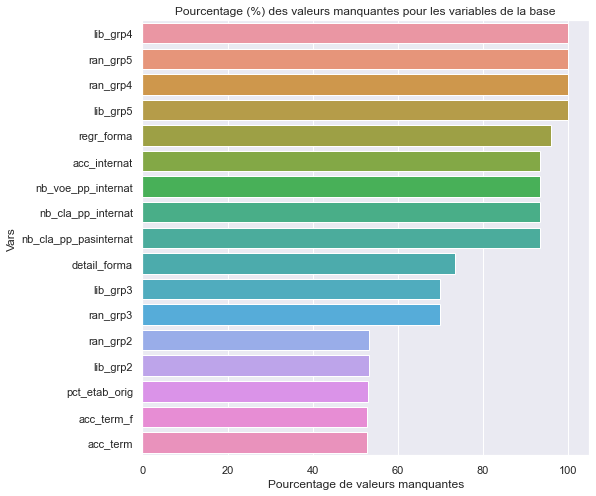

In [26]:
plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Pourcentage de valeurs manquantes", y='Vars', data=missings[missings['Pourcentage de valeurs manquantes']>20])
plt.title('Pourcentage (%) des valeurs manquantes pour les variables de la base')


In [27]:
vars_50 = list(missings[missings['Pourcentage de valeurs manquantes']<50]['Vars'])
len(vars_50)

102

In [28]:
#1. Méthodes graphiques : Box-plot, nuage de points, histogrammes...

In [29]:
#histogramme
def graph(data):
    for colonne in data.columns:
        print('***************************************************************************')
        print('             :------------',colonne,'------------:')
        print('***************************************************************************')
        df[colonne].hist()
        plt.show()

***************************************************************************
             :------------ nb_voe_pp_at ------------:
***************************************************************************


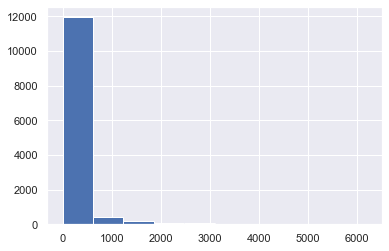

***************************************************************************
             :------------ nb_voe_pp_bp ------------:
***************************************************************************


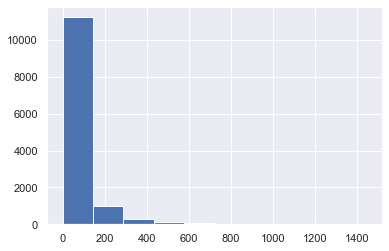

***************************************************************************
             :------------ nb_voe_pp_bg ------------:
***************************************************************************


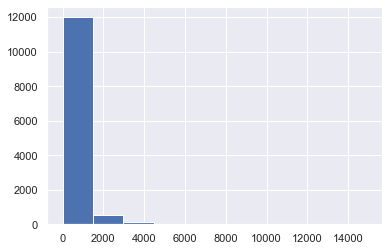

***************************************************************************
             :------------ pct_sansmention ------------:
***************************************************************************


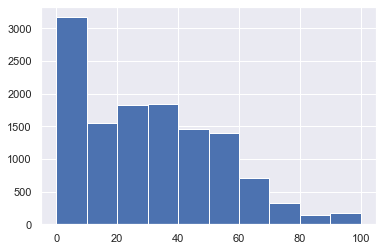

***************************************************************************
             :------------ acc_brs ------------:
***************************************************************************


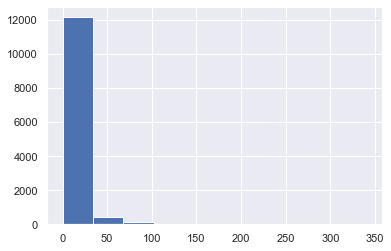

***************************************************************************
             :------------ acc_bg ------------:
***************************************************************************


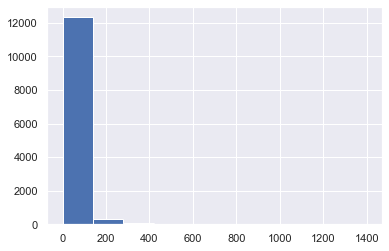

***************************************************************************
             :------------ acc_bg_mention ------------:
***************************************************************************


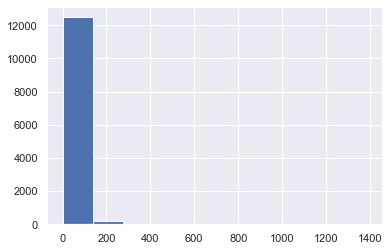

***************************************************************************
             :------------ prop_tot_bp_brs ------------:
***************************************************************************


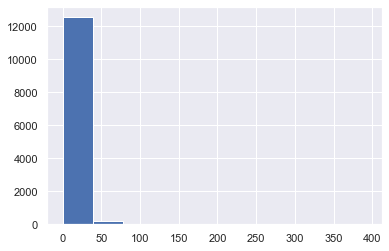

***************************************************************************
             :------------ taux_adm_psup_gen ------------:
***************************************************************************


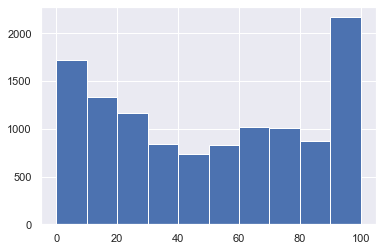

***************************************************************************
             :------------ pct_bp_mention ------------:
***************************************************************************


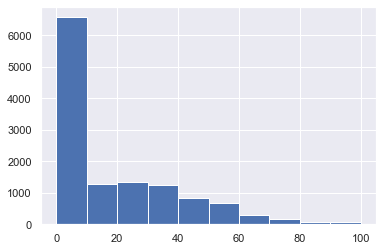

***************************************************************************
             :------------ ran_grp3 ------------:
***************************************************************************


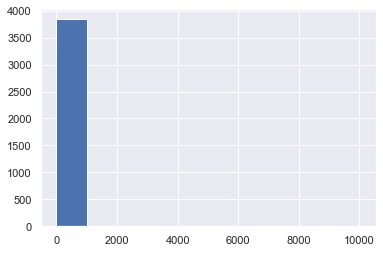

***************************************************************************
             :------------ acc_finpp ------------:
***************************************************************************


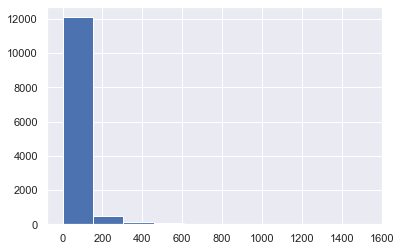

***************************************************************************
             :------------ acc_pc ------------:
***************************************************************************


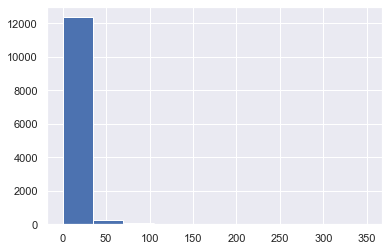

***************************************************************************
             :------------ nb_cla_pp_bg ------------:
***************************************************************************


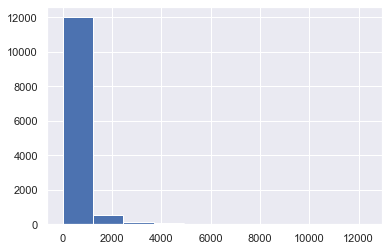

***************************************************************************
             :------------ acc_bt ------------:
***************************************************************************


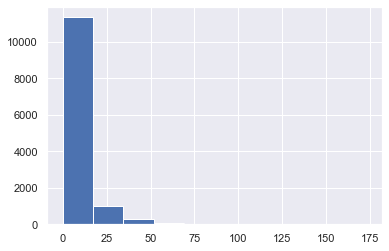

***************************************************************************
             :------------ nb_cla_pp_bt_brs ------------:
***************************************************************************


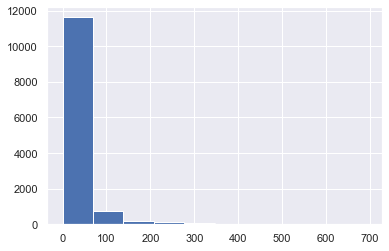

***************************************************************************
             :------------ nb_voe_pp_bt ------------:
***************************************************************************


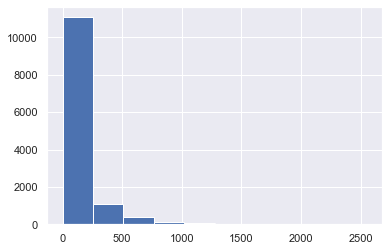

***************************************************************************
             :------------ prop_tot_bg_brs ------------:
***************************************************************************


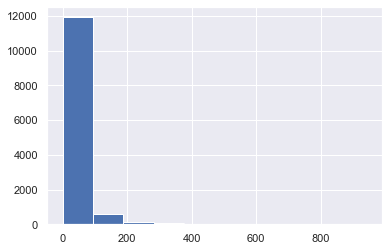

***************************************************************************
             :------------ taux_adm_psup_pro ------------:
***************************************************************************


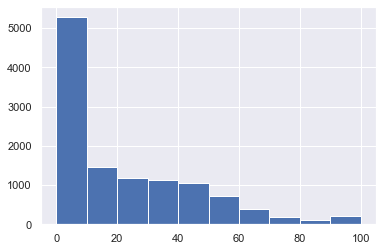

***************************************************************************
             :------------ pct_aca_orig ------------:
***************************************************************************


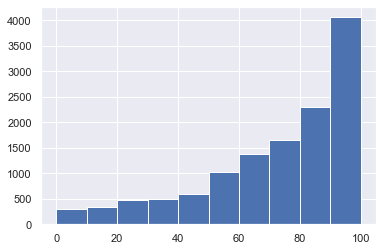

***************************************************************************
             :------------ prop_tot_bt ------------:
***************************************************************************


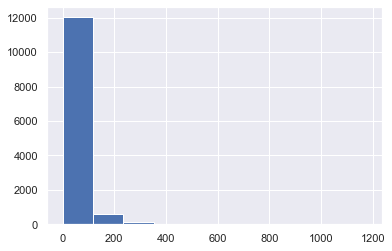

***************************************************************************
             :------------ acc_pp ------------:
***************************************************************************


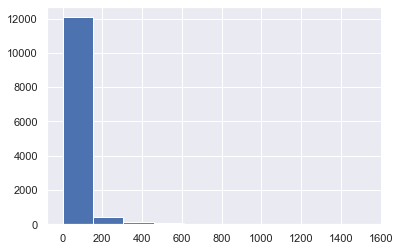

***************************************************************************
             :------------ voe_tot ------------:
***************************************************************************


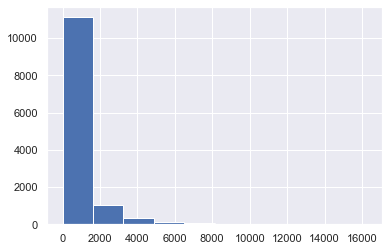

***************************************************************************
             :------------ nb_voe_pp ------------:
***************************************************************************


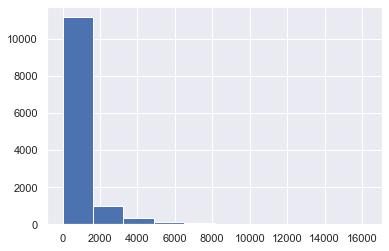

***************************************************************************
             :------------ pct_acc_debutpp ------------:
***************************************************************************


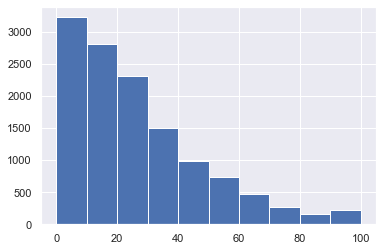

***************************************************************************
             :------------ prop_tot_bp ------------:
***************************************************************************


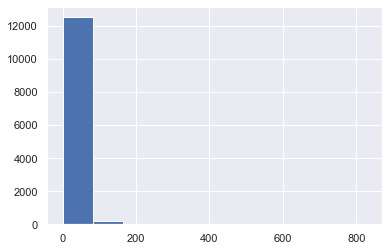

***************************************************************************
             :------------ pct_tb ------------:
***************************************************************************


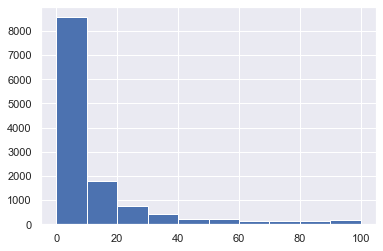

***************************************************************************
             :------------ prop_tot_bt_brs ------------:
***************************************************************************


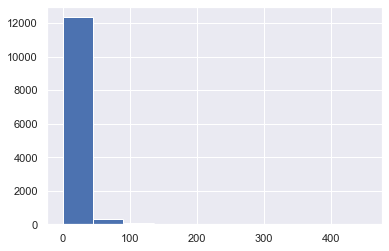

***************************************************************************
             :------------ pct_etab_orig ------------:
***************************************************************************


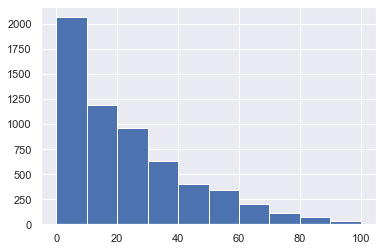

***************************************************************************
             :------------ pct_mention_nonrenseignee ------------:
***************************************************************************


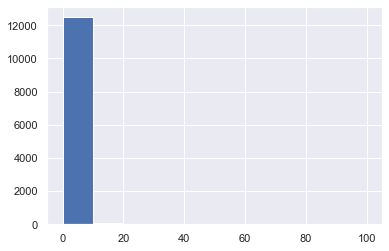

***************************************************************************
             :------------ acc_ab ------------:
***************************************************************************


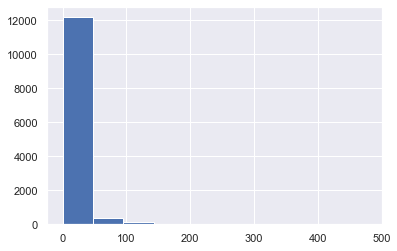

***************************************************************************
             :------------ acc_aca_orig ------------:
***************************************************************************


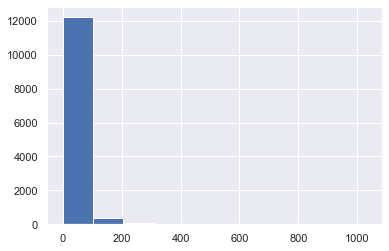

***************************************************************************
             :------------ pct_ab ------------:
***************************************************************************


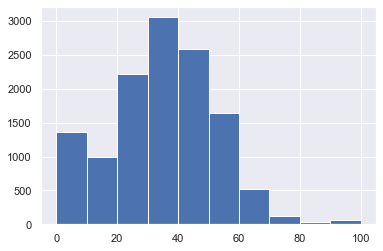

***************************************************************************
             :------------ nb_voe_pc_bp ------------:
***************************************************************************


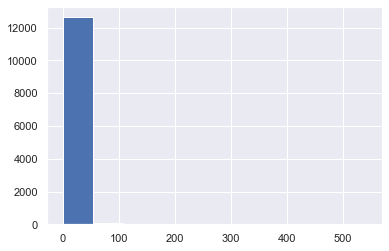

***************************************************************************
             :------------ pct_acc_finpp ------------:
***************************************************************************


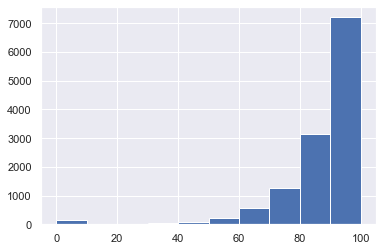

***************************************************************************
             :------------ nb_voe_pp_bg_brs ------------:
***************************************************************************


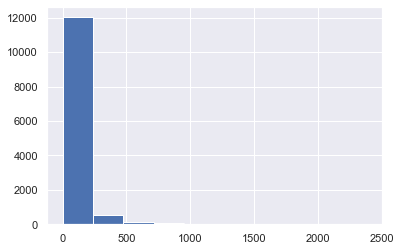

***************************************************************************
             :------------ nb_cla_pp_bp ------------:
***************************************************************************


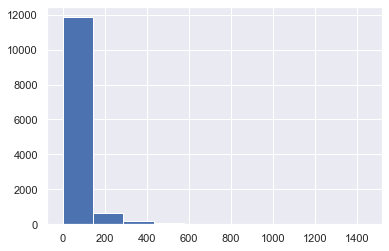

***************************************************************************
             :------------ ran_grp1 ------------:
***************************************************************************


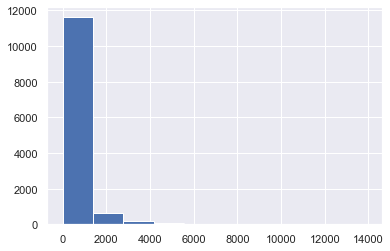

***************************************************************************
             :------------ pct_bg ------------:
***************************************************************************


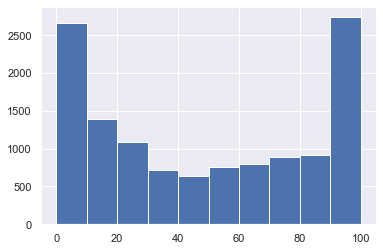

***************************************************************************
             :------------ pct_bours ------------:
***************************************************************************


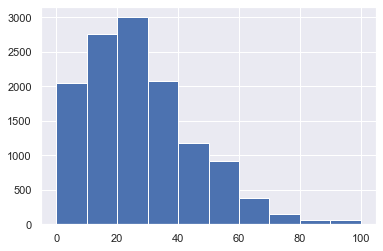

***************************************************************************
             :------------ nb_voe_pc_at ------------:
***************************************************************************


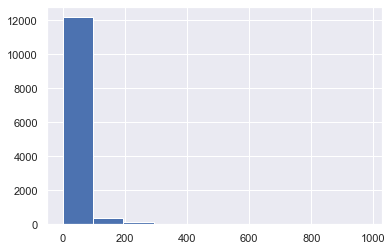

***************************************************************************
             :------------ acc_aca_orig_idf ------------:
***************************************************************************


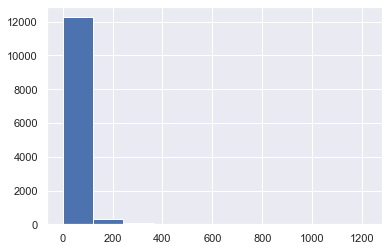

***************************************************************************
             :------------ pct_f ------------:
***************************************************************************


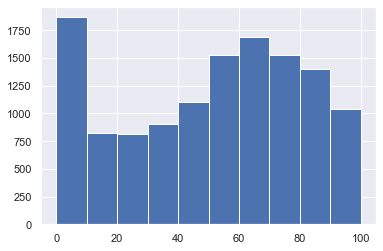

***************************************************************************
             :------------ acc_bt_mention ------------:
***************************************************************************


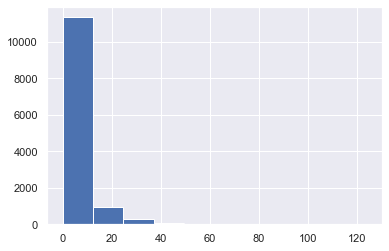

***************************************************************************
             :------------ nb_cla_pp ------------:
***************************************************************************


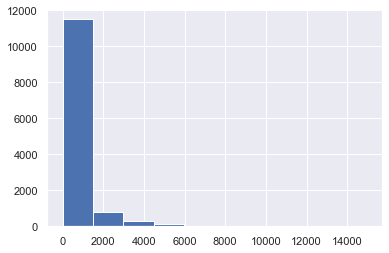

***************************************************************************
             :------------ acc_term ------------:
***************************************************************************


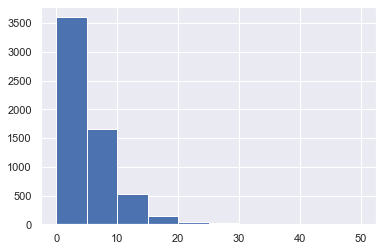

***************************************************************************
             :------------ prop_tot ------------:
***************************************************************************


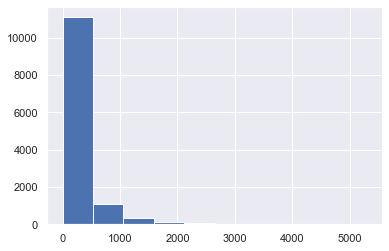

***************************************************************************
             :------------ nb_voe_pc_bt ------------:
***************************************************************************


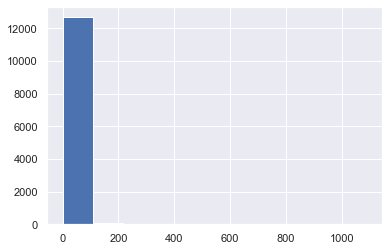

***************************************************************************
             :------------ acc_datebac ------------:
***************************************************************************


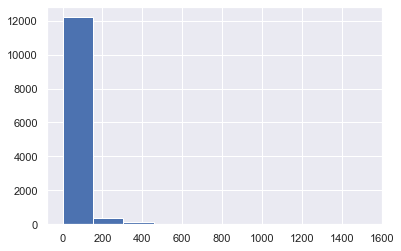

***************************************************************************
             :------------ acc_tot ------------:
***************************************************************************


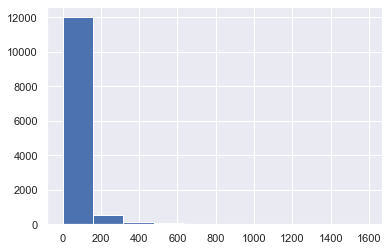

***************************************************************************
             :------------ nb_cla_pp_bg_brs ------------:
***************************************************************************


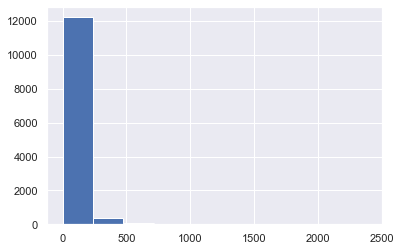

***************************************************************************
             :------------ pct_bt ------------:
***************************************************************************


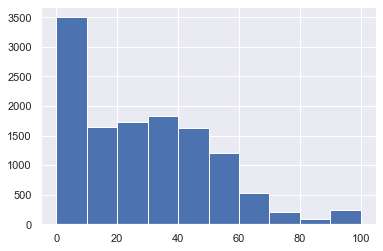

***************************************************************************
             :------------ prop_tot_bg ------------:
***************************************************************************


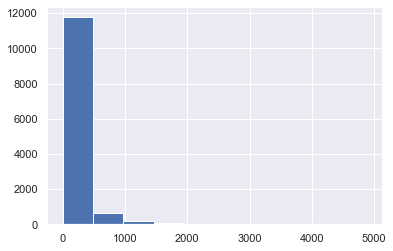

***************************************************************************
             :------------ nb_voe_pp_bt_brs ------------:
***************************************************************************


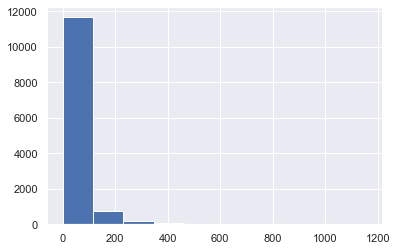

***************************************************************************
             :------------ acc_mention_nonrenseignee ------------:
***************************************************************************


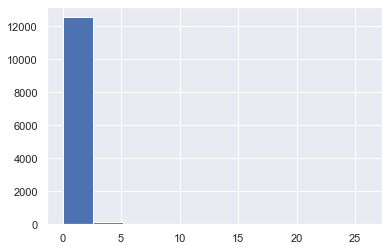

***************************************************************************
             :------------ nb_voe_pp_bp_brs ------------:
***************************************************************************


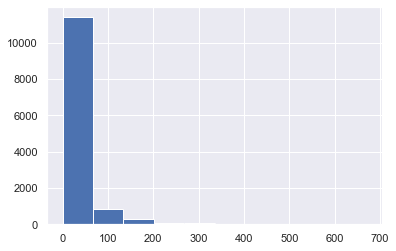

***************************************************************************
             :------------ acc_bp_mention ------------:
***************************************************************************


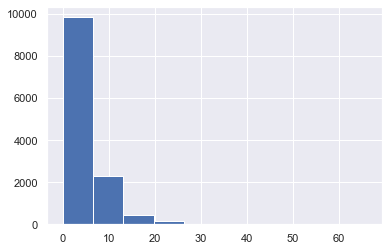

***************************************************************************
             :------------ acc_sansmention ------------:
***************************************************************************


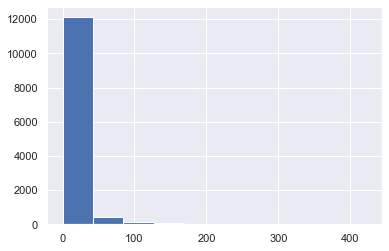

***************************************************************************
             :------------ acc_tb ------------:
***************************************************************************


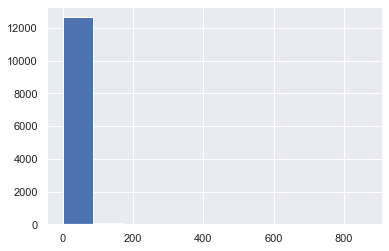

***************************************************************************
             :------------ prop_tot_at ------------:
***************************************************************************


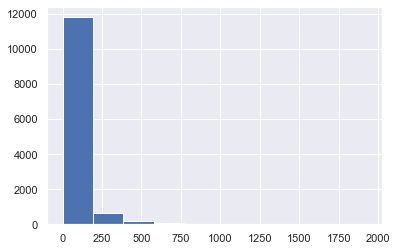

***************************************************************************
             :------------ capa_fin ------------:
***************************************************************************


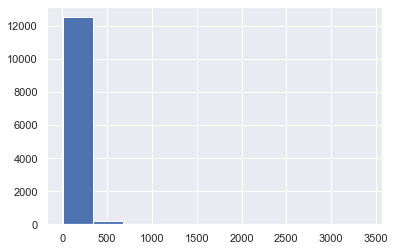

***************************************************************************
             :------------ acc_at ------------:
***************************************************************************


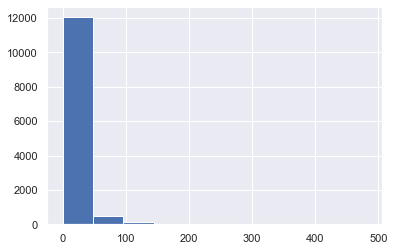

***************************************************************************
             :------------ nb_cla_pp_at ------------:
***************************************************************************


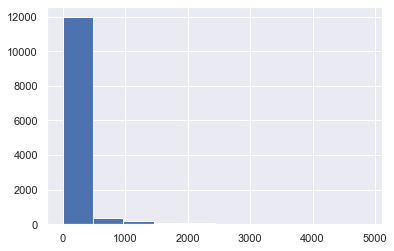

***************************************************************************
             :------------ acc_tot_f ------------:
***************************************************************************


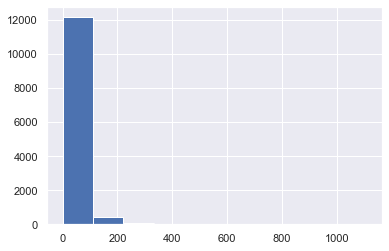

***************************************************************************
             :------------ voe_tot_f ------------:
***************************************************************************


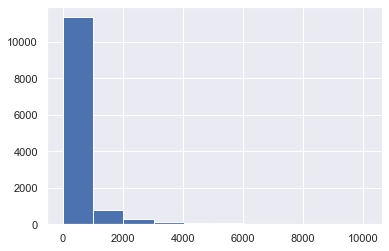

***************************************************************************
             :------------ acc_neobac ------------:
***************************************************************************


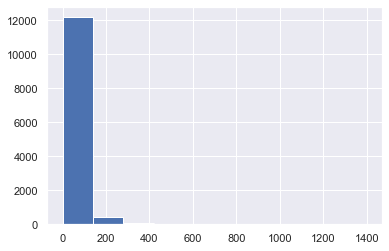

***************************************************************************
             :------------ nb_voe_pc ------------:
***************************************************************************


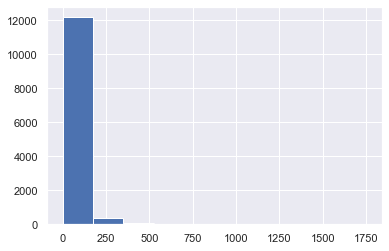

***************************************************************************
             :------------ pct_bg_mention ------------:
***************************************************************************


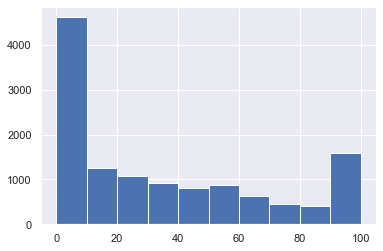

***************************************************************************
             :------------ pct_bp ------------:
***************************************************************************


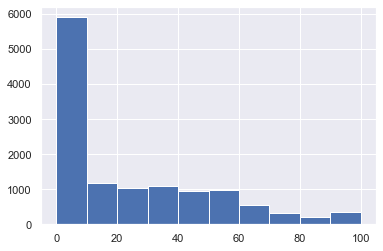

***************************************************************************
             :------------ acc_debutpp ------------:
***************************************************************************


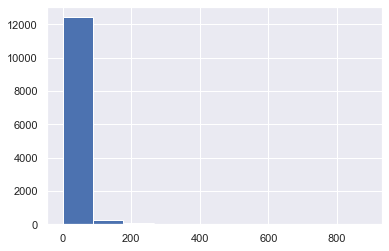

***************************************************************************
             :------------ acc_term_f ------------:
***************************************************************************


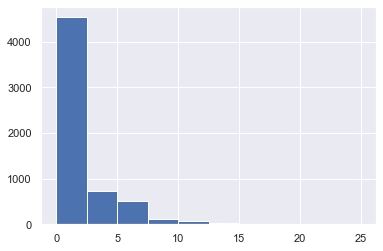

***************************************************************************
             :------------ pct_neobac ------------:
***************************************************************************


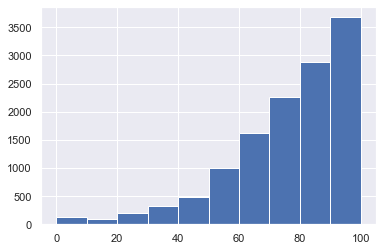

***************************************************************************
             :------------ pct_aca_orig_idf ------------:
***************************************************************************


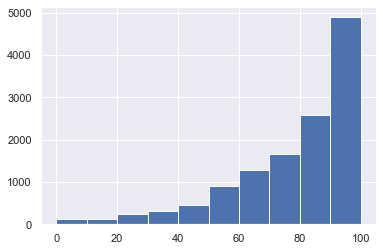

***************************************************************************
             :------------ nb_cla_pc ------------:
***************************************************************************


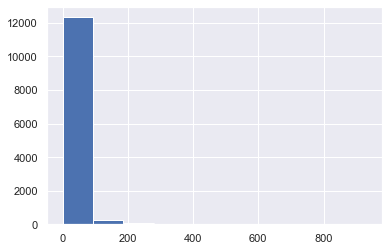

***************************************************************************
             :------------ nb_cla_pp_bp_brs ------------:
***************************************************************************


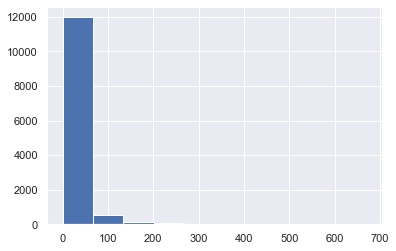

***************************************************************************
             :------------ pct_b ------------:
***************************************************************************


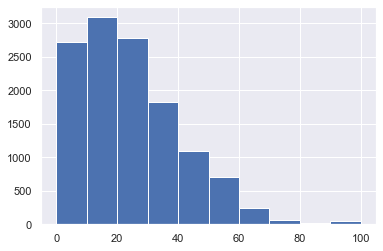

***************************************************************************
             :------------ taux_adm_psup ------------:
***************************************************************************


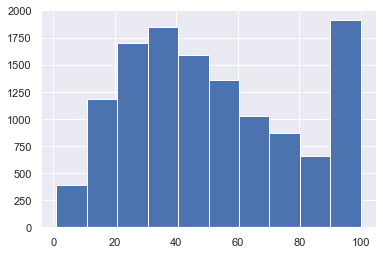

***************************************************************************
             :------------ pct_bt_mention ------------:
***************************************************************************


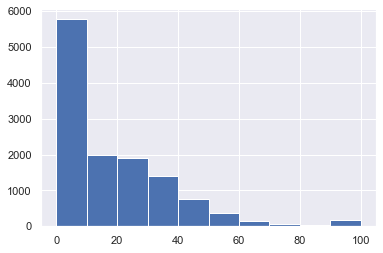

***************************************************************************
             :------------ nb_cla_pp_bt ------------:
***************************************************************************


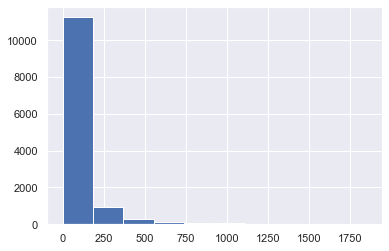

***************************************************************************
             :------------ ran_grp2 ------------:
***************************************************************************


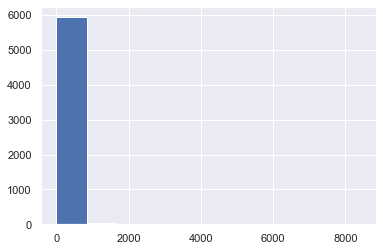

***************************************************************************
             :------------ nb_voe_pc_bg ------------:
***************************************************************************


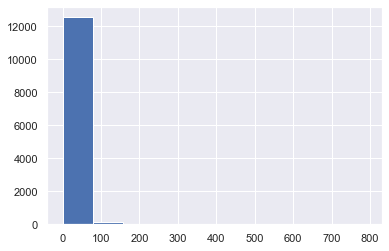

***************************************************************************
             :------------ acc_bp ------------:
***************************************************************************


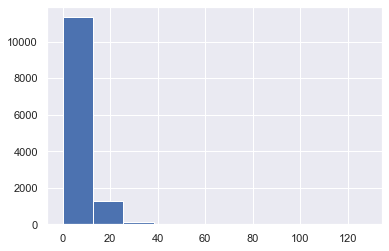

***************************************************************************
             :------------ acc_b ------------:
***************************************************************************


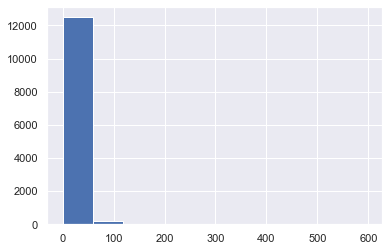

***************************************************************************
             :------------ pct_acc_datebac ------------:
***************************************************************************


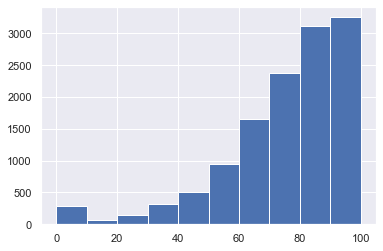

***************************************************************************
             :------------ taux_adm_psup_techno ------------:
***************************************************************************


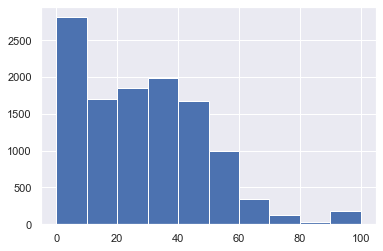

***************************************************************************
             :------------ nb_cla_pp_internat ------------:
***************************************************************************


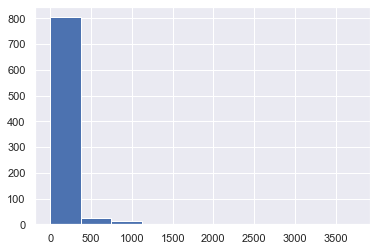

***************************************************************************
             :------------ nb_voe_pp_internat ------------:
***************************************************************************


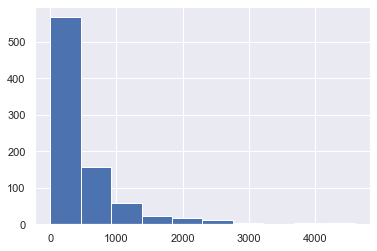

***************************************************************************
             :------------ acc_internat ------------:
***************************************************************************


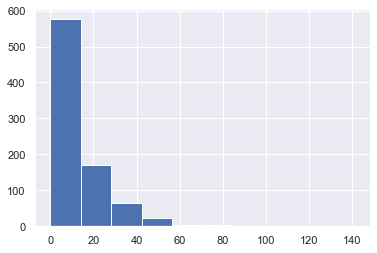

***************************************************************************
             :------------ nb_cla_pp_pasinternat ------------:
***************************************************************************


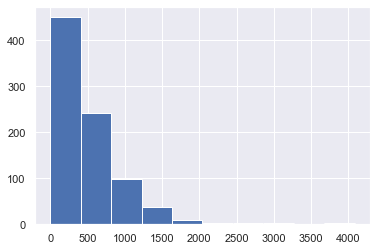

***************************************************************************
             :------------ ran_grp4 ------------:
***************************************************************************


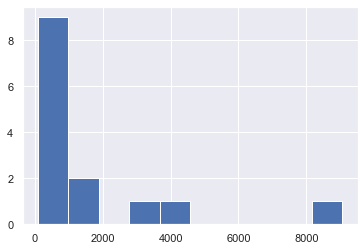

***************************************************************************
             :------------ ran_grp5 ------------:
***************************************************************************


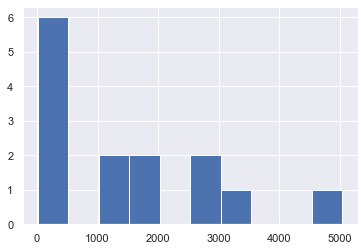

In [30]:
graph(df_n)

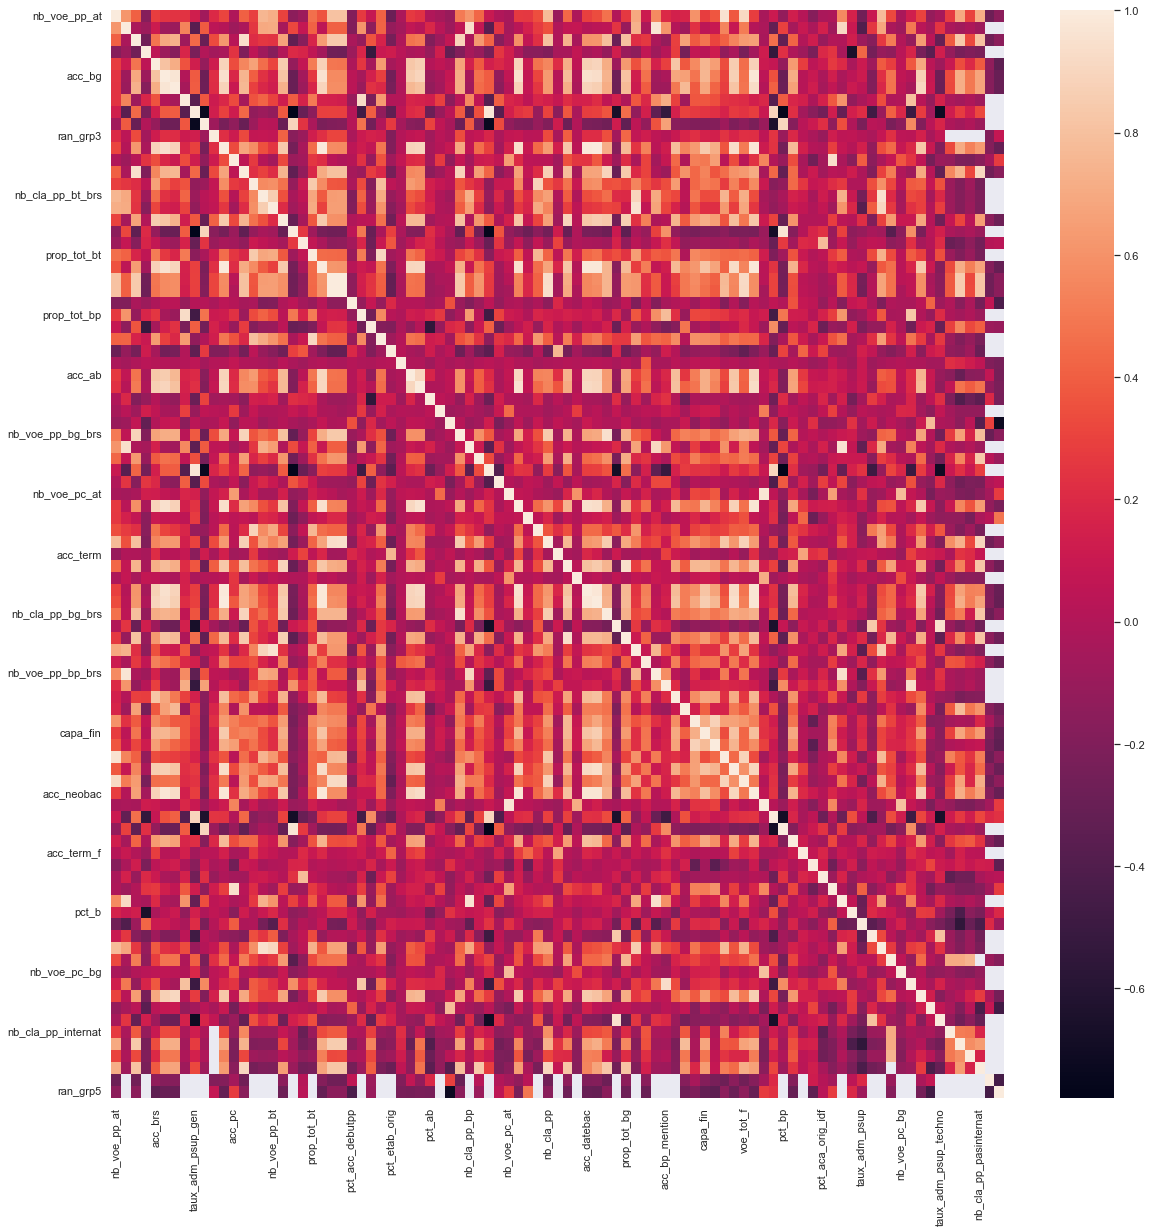

In [31]:
###Corrélation_Matrice
corrMatrix = df_n.corr()
sns.heatmap(corrMatrix, annot=False)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('Matrice_Correlation.png')

In [32]:
#!pip install "pandas-profiling-3.1.0.tar.gz" --user
#!pip uninstall pandas-profiling 

In [33]:
## Statistiques descriptives
#import pandas_profiling as pp



#rapport = pp.ProfileReport(glob_data, title='Statistiques descriptives', explorative=True)
#rapport.to_widgets()
#rapport.to_notebook_iframe()


In [35]:
#pp.ProfileReport()

In [36]:
#!pip install autoviz --user
#!pip install emoji
!pip install dtale --user

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-f5bdn3ym\\lz4_5ef06e20f1ce45bcbeb4b3e21b691661\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-f5bdn3ym\\lz4_5ef06e20f1ce45bcbeb4b3e21b691661\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Asus ZenBook\AppData\Local\Temp\pip-wheel-xp1rjhrz'
       cwd: C:\Users\Asus ZenBook\AppData\Local\Temp\pip-install-f5bdn3ym\lz4_5ef06e20f1ce45bcbeb4b3e21b691661\
  Complete output (17 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win

  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=47480c5fa5d5b913b0c2428d95dda1fa4fd2eed752ccf0f15ae4976068adda1f
  Stored in directory: c:\users\asus zenbook\appdata\local\pip\cache\wheels\2b\37\e9\4b5a8c878a47590de4dcf6bdc5a158788a1c17bea578a3ab60
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=e8f6a6fcc42557964b3de15d367ab6bfe4f5e05e0dafe51110c5c29d822f70a8
  Stored in directory: c:\users\asus zenbook\appdata\local\pip\cache\wheels\4d\22\3e\d58dc9820aeffc7b7193d04a63b08f585eef4a1ce836d69141
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=0ea5fd032fb9ad3c24b82e4dfbf1402f08fc3ca57620363d757fbaefa17b7d32
  Stored in directory: c:\users\asus zenbook\appdata\local\pip\cache\wheels\1f\91\7e\015c42538da07aeb06576caca14da7c7416e9275a51fc85811
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-an


    copying lz4\block\__init__.py -> build\lib.win-amd64-3.9\lz4\block
    creating build\lib.win-amd64-3.9\lz4\frame
    copying lz4\frame\__init__.py -> build\lib.win-amd64-3.9\lz4\frame
    creating build\lib.win-amd64-3.9\lz4\stream
    copying lz4\stream\__init__.py -> build\lib.win-amd64-3.9\lz4\stream
    running build_ext
    building 'lz4._version' extension
    error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-f5bdn3ym\\lz4_5ef06e20f1ce45bcbeb4b3e21b691661\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-f5bdn3ym\\lz4_5ef06e20f1ce45bcbeb4b3e21b691661\\setup.py'"'"';f = getattr(t

In [37]:
import dtale
import pandas as pd
d = dtale.show(df)
d.open_browser()

ModuleNotFoundError: No module named 'dtale'

In [38]:
sns.pairplot(df[:10])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C23ED1D1F0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df.plot(kind=’box’, subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color=’deeppink’)

In [ ]:
mask = np.tril(df1.corr())
sns.heatmap(df1.corr(), fmt=’.1g’, annot = True, cmap= ‘cool’, mask=mask)

In [ ]:
#sns.catplot(data=glob_data[:], kind="swarm", x="contrat_etab", y="acc_tot", hue="select_form")


In [ ]:
!pip install pandas-profiling --user


In [ ]:
### STATISTIQUES

In [ ]:
## Effectif total des candidats pour une formation : voe_tot

In [ ]:
#selon le sexe

df['voe_tot_%_filles'] = 100*df['voe_tot_f']/df['voe_tot']

In [ ]:
df['voe_tot_%_filles'].describe()

In [ ]:
df['g_ea_lib_vx'][df['voe_tot_%_filles'] == 0]

In [ ]:
sns.barplot(x="voe_tot",  y="tri", data=df, ci=None)


In [ ]:
sns.barplot(x="voe_tot_f",  y="tri", data=df, ci=None)

In [ ]:
data = df[['g_ea_lib_vx','voe_tot',  'voe_tot_%_filles']].melt('g_ea_lib_vx', var_name='Type', value_name='effectif')

In [ ]:
li = list(df['voe_tot']) + list(df['voe_tot_f'])

In [ ]:
#create DataFrame
df_p = pd.DataFrame({'Valeurs':list(df['voe_tot']) + list(df['voe_tot_f']),
                     
                   'Tri': list(df['tri'])+ list(df['tri'])
                     ,
                     
                   'Iden':['Total']*len(df)+ ['Filles']*len(df)
                               })

In [ ]:
df_p

In [ ]:
sns.barplot(x="Valeurs",  y="Tri", data=df_p, ci=None, hue = 'Iden')

In [ ]:
df["filles"] = df['voe_tot_f']
df["garcons"] = df['voe_tot'] - df['voe_tot_f']
hom = fem = df[['tri','garcons']].groupby('tri').sum()
fem = df[['tri','filles']].groupby('tri').sum()

In [ ]:
base = pd.concat([hom,fem],axis = 1)
base.reset_index(inplace = True)

In [ ]:
base['garcons'] = 100*base['garcons']/(base['garcons'] + base['filles'])

In [ ]:
base['filles'] =100- base['garcons']

In [ ]:
base_ =base.melt('tri', var_name='Sexe', value_name= "Valeurs")
base_

In [ ]:
plt.subplots(figsize=(12, 5))
sx = sns.barplot(x="Valeurs",  y="tri", data=base_, ci=None, hue = 'Sexe')
x_labels = base_['Valeurs']
sx.set 

### 1.3 INSERTION PROFESSIONNEL



https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-insertion_professionnelle-lp&q=&rows=1500&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018

In [ ]:
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018"

In [ ]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [ ]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [ ]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [ ]:
data_insertion[0].shape

In [ ]:
data_insertion[1].shape

In [ ]:
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

In [ ]:
glob_data_insertion.head()

## ETABLISSEMENT BAMOUNI

In [13]:
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_row', None)

In [14]:
df = df.copy()

## Pretraitement des données
### Analyse de la forme

In [15]:
print(df.shape)
print(df.dtypes.value_counts())

(12760, 120)
int64      45
float64    41
object     34
dtype: int64


**La base de données que nous allons modéliser comprend 120 variables et 12760 individus. Les variables sont principalement de deux types : les quantitatives (float) et les qualitatives (in64 et object)**

<AxesSubplot:>

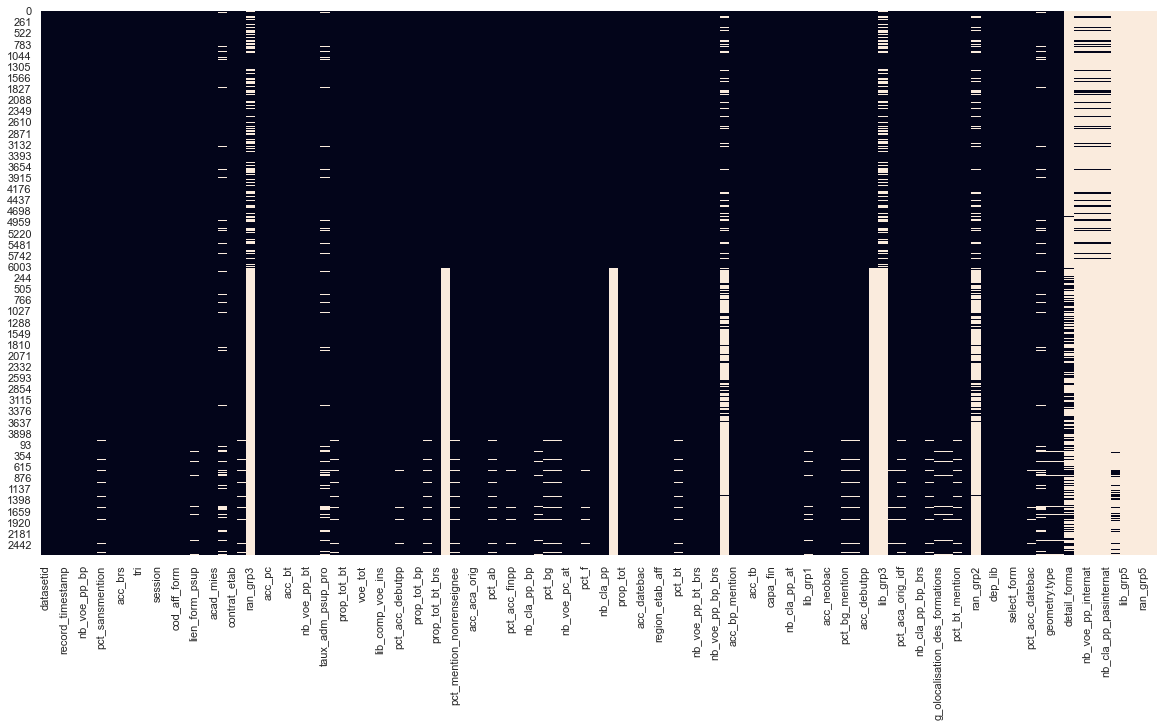

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [18]:
# Taux de valeurs manquantes par variable
taux_nan = df.isna().sum()/df.shape[0]

# Affichage des taux de valeurs manquantes par variable
taux_nan.sort_values(ascending=True)

datasetid                         0.000000
nb_voe_pp_bt_brs                  0.000000
prop_tot_bg                       0.000000
nb_cla_pp_bg_brs                  0.000000
region_etab_aff                   0.000000
acc_tot                           0.000000
acc_datebac                       0.000000
nb_voe_pc_bt                      0.000000
acc_mention_nonrenseignee         0.000000
prop_tot                          0.000000
acc_aca_orig_idf                  0.000000
nb_voe_pc_at                      0.000000
nb_cla_pp_bp                      0.000000
nb_voe_pp_bg_brs                  0.000000
nb_voe_pc_bp                      0.000000
g_ea_lib_vx                       0.000000
acc_aca_orig                      0.000000
nb_cla_pp                         0.000000
nb_voe_pp_bp_brs                  0.000000
acc_bp_mention                    0.000000
acc_sansmention                   0.000000
acc_b                             0.000000
select_form                       0.000000
acc_bp     

Certaines variables de notre DataFrame contiennent assez de valeurs manquantes. Ces variables etant en faible nombre et n'étant pas aussi pertinentes, nous allons les supprimer de notre DataFrame afin de conserver assez d'exemples pour notre apprentissage du modèle

### Analyse du fond
#### 1. Visulation initiale - Elimination des colonnes inutiles

In [19]:
# Récupération des variables ayant un taux de valeurs manquantes inférieur à 50%
df = df[df.columns[taux_nan <0.5]]
print(df.shape)

(12760, 103)


In [20]:
df.isna().sum(axis=0)
df = df.dropna()

Les valeurs manquantes restantes sont en faibles nombre par rapport à la taille de notre échantillon. Ainsi, nous allons les supprimer de notre jeude données

(11592, 103)


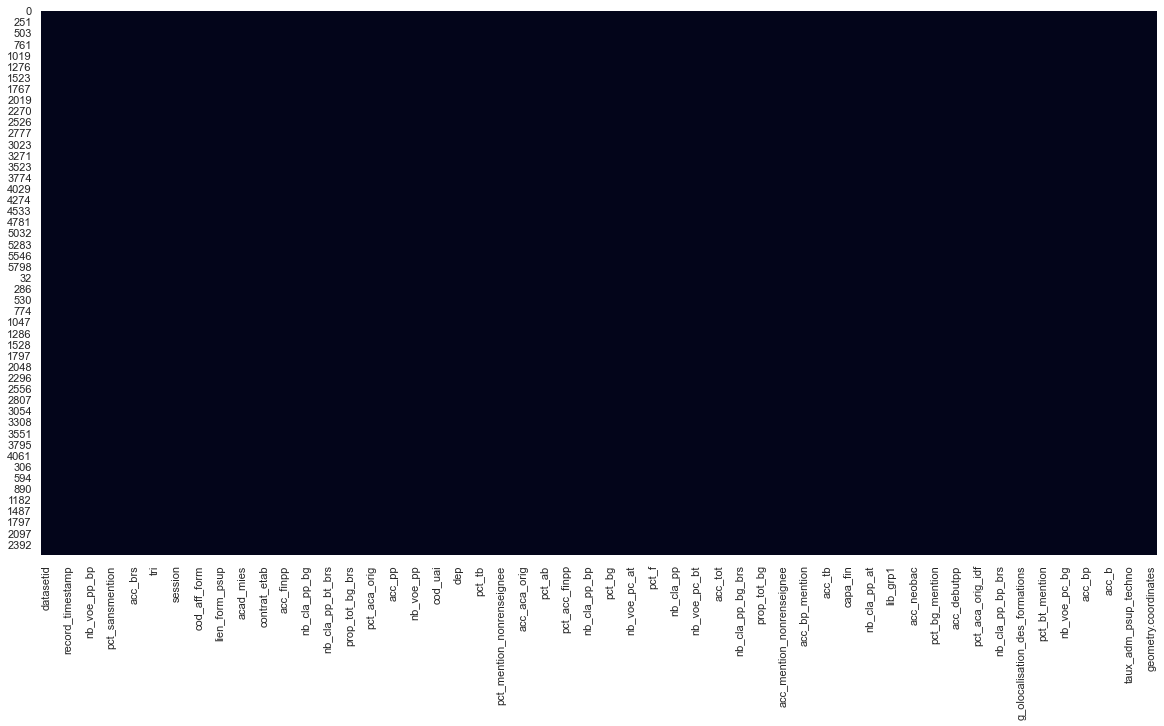

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
print(df.shape)

Après un premier traitement, nous nous retrouvons avec un jeux de données disposant de 11592 observations et 111 variables

### Construction de la colonne target

In [22]:
df['fil_lib_voe_acc']

0                                        Métiers de l'eau
1       Analyse, conduite et stratégie de l'entreprise...
2                                  Aménagements paysagers
3                      Gestion et protection de la nature
4                      Management Commercial Opérationnel
5               Pêche et gestion de l'environnement marin
6       Analyse, conduite et stratégie de l'entreprise...
7                    Etude et économie de la construction
8                              Economie sociale familiale
9                                       Gestion de la PME
10                             Economie sociale familiale
11                     Management Commercial Opérationnel
12                               Professions immobilières
13                             Economie sociale familiale
14      Conception et Réalisation de Systèmes Automati...
15                  Management en hôtellerie restauration
16      Maintenance des systèmes - option A Systèmes d...
17      Mainte

In [23]:
df.head()

,datasetid,recordid,record_timestamp,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,session,form_lib_voe_acc,cod_aff_form,fili,lien_form_psup,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,g_olocalisation_des_formations,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno,geometry.type,geometry.coordinates
0,fr-esr-parcoursup,5ddd4059ccae7206ae2f39b37d08495258e52dff,2021-02-04T13:10:28.998000+00:00,21,19,4,30.769231,Métiers de l'eau,9,1,2_Lycées,0,2020,BTS - Production,23320,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,3.0,La Réunion,6.0,Public,15.38,13.0,1,3,10,38,96,2.0,13.0,92.31,37.0,15,145,140,Lycée de St Paul 4 - BTS - Production - Métier...,9741380G,12.50,974,4.0,0.0,22.0,0.0,6,12,Lycée de St Paul 4,46.153846,3,81.25,2,12,41.0,7.692308,69.23,1,12,12.50,7,90,47,1,12.0,16,La Réunion,2,76.923077,3.0,57,0,13,2,4,0,3.0,15.0,3,8,2,Bacheliers technologiques toutes séries,50,13,5,0.00,15.384615,2.0,81.25,92.31,1,10,23.076923,"[-20.9794, 55.3165]",34.0,53.85,67,0,La Réunion,2,formation selective,3,75.00,81.0,Point,"[55.3165, -20.9794]"
1,fr-esr-parcoursup,a7f51872796481d96bbfcc6cfcc1fd13a8a291c3,2021-02-04T13:10:28.998000+00:00,9,8,3,0.000000,"Analyse, conduite et stratégie de l'entreprise...",0,0,2_Lycées,0,2020,BTS - Agricole,23461,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,2.0,Clermont-Ferrand,0.0,Public,100.00,1.0,0,3,0,2,11,0.0,100.0,0.00,9.0,1,46,31,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,100.00,63,8.0,100.0,2.0,0.0,0,0,AgroSup Dijon Direction Enseignement à Distanc...,0.000000,2,100.00,0,6,4.0,0.000000,0.00,9,0,0.00,0,20,25,3,1.0,1,Auvergne-Rhône-Alpes,0,0.000000,3.0,4,0,2,1,0,1,5.0,20.0,0,3,0,Tous les candidats sauf les Bac technologiques...,23,1,15,0.00,100.000000,1.0,100.00,0.00,5,2,0.000000,"[45.7749, 3.1766]",65.0,0.00,8,1,Puy-de-Dôme,1,formation selective,0,100.00,0.0,Point,"[3.1766, 45.7749]"
2,fr-esr-parcoursup,94819eeabba33cc018ac8925f34d5b6fa795f0cd,2021-02-04T13:10:28.998000+00:00,158,26,28,50.000000,Aménagements paysagers,0,1,2_Lycées,0,2020,BTS - Agricole,23462,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,8.0,Clermont-Ferrand,25.0,Public,50.00,3.0,1,22,0,13,53,4.0,25.0,0.00,40.0,3,455,265,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,25.00,63,21.0,0.0,10.0,0.0,1,0,AgroSup Dijon Direction Enseignement à Distanc...,50.000000,13,75.00,6,24,54.0,50.000000,0.00,114,0,50.00,0,126,117,36,3.0,4,Auvergne-Rhône-Alpes,3,0.000000,25.0,13,0,10,1,1,0,31.0,20.0,2,35,2,Bacheliers technologiques toutes séries,158,2,190,0.00,50.000000,1.0,50.00,0.00,21,9,0.000000,"[45.7749, 3.1766]",46.0,0.00,45,27,Puy-de-Dôme,1,formation selective,0,75.00,50.0,Point,"[3.1766, 45.7749]"
3,fr-esr-parcoursup,119257913ef26bbfcdf0d2c46ab5ad87cc01a73e,2021-02-04T13:10:28.998000+00:00,113,38,61,62.500000,Gestion et protection de la nature,1,3,2_Lycées,1,2020,BTS - Agricole,23464,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,6.0,Clermont-Ferrand,50.0,Public,12.50,18.0,1,42,3,5,45,2.0,25.0,0.00,15.0,18,271,257,AgroSup Dijon Direc

In [89]:
voeux = pd.DataFrame(df['fil_lib_voe_acc'].value_counts(ascending=False))
voeux

,fil_lib_voe_acc
"Langues, littératures & civilisations étrangères et régionales",465
Comptabilité et gestion,346
Management Commercial Opérationnel,332
Langues étrangères appliquées,311
Formation d'ingénieur Bac + 5,282
D.E Infirmier,275
Gestion de la PME,266
Lettres,247
Support à l'action managériale,247
Droit,245


In [149]:
demande_par_filière = df.groupby('filière de formation très agrégée')['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'].sum()

<AxesSubplot:ylabel='Frequency'>

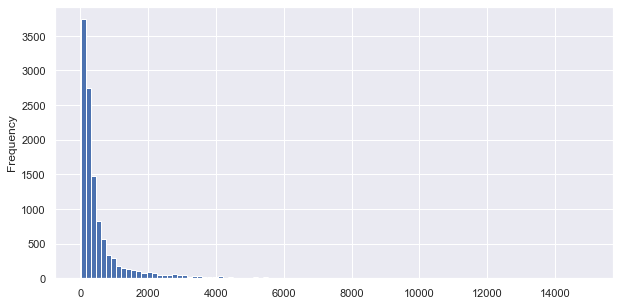

In [245]:
plt.figure(figsize=(10,5))
df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

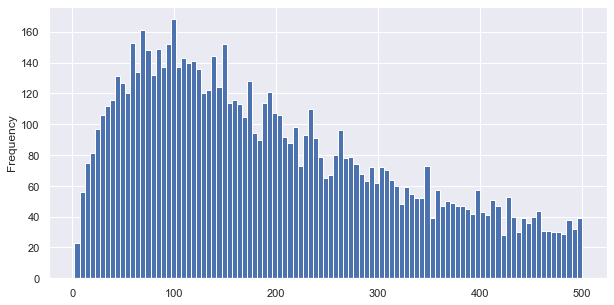

In [275]:
plt.figure(figsize=(10,5))
df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'][df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']<=500].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

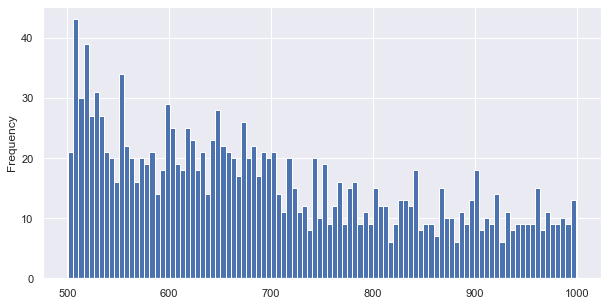

In [273]:
plt.figure(figsize=(10,5))
df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'][(df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']<1000) & (df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']>500 )].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

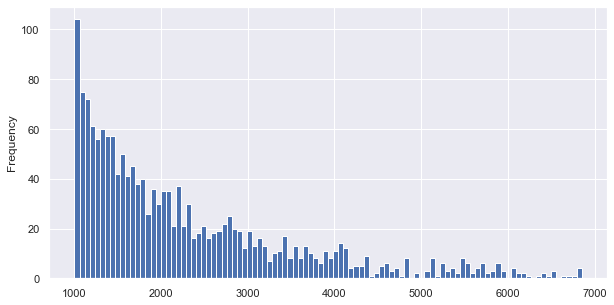

In [266]:
plt.figure(figsize=(10,5))
df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'][(df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']<7000) & (df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']>1000 )].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

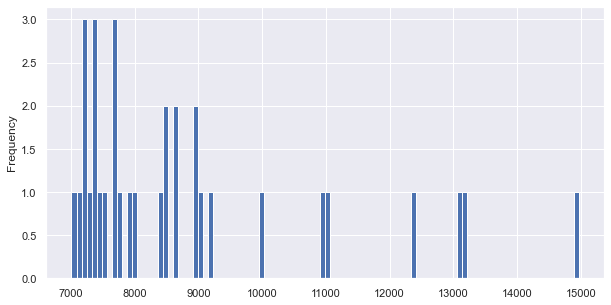

In [263]:
plt.figure(figsize=(10,5))
df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'][df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']>=7000].plot.hist(bins = 100)

In [88]:
y = pd.qcut(df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'],3,labels=[1,2, 3])

KeyError: 'Effectif total des candidats classés par l_établisseme nt en phaseprincipale'

In [293]:
y = df['filière de formation très agrégée']

In [87]:
from sklearn.preprocessing import KBinsDiscretizer
kmeans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
X = df['Effectif total des candidats classés par l_établisseme nt en phaseprincipale']
X = X.array.reshape(-1, 1)
df['voeux_class'] = kmeans.fit_transform(X).astype(int)

KeyError: 'Effectif total des candidats classés par l_établisseme nt en phaseprincipale'

In [313]:
 df.groupby('voeux_class')['Effectif total des candidats classés par l_établisseme nt en phaseprincipale'].describe()

,count,mean,std,min,25%,50%,75%,max
voeux_class,,,,,,,,
0,9449.0,247.179596,185.153398,2.0,101.00,196.0,353.0,782.0
1,1492.0,1312.981233,414.771264,783.0,959.75,1205.0,1622.0,2260.0
2,526.0,3203.631179,679.397658,2264.0,2646.25,3046.5,3694.5,4855.0
3,125.0,6537.720000,1771.559554,4927.0,5461.00,5895.0,7145.0,14968.0


In [316]:
 df.groupby('voeux_class')['filière de formation très agrégée'].count()

voeux_class
0    9449
1    1492
2     526
3     125
Name: filière de formation très agrégée, dtype: int64

In [322]:
df.pivot_table(index='voeux_class',columns='filière de formation très agrégée', 
                                                   aggfunc=len,margins=True,
                                                  margins_name="Total")


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [86]:
print(f'{X} {X_binned}')

NameError: name 'X_binned' is not defined

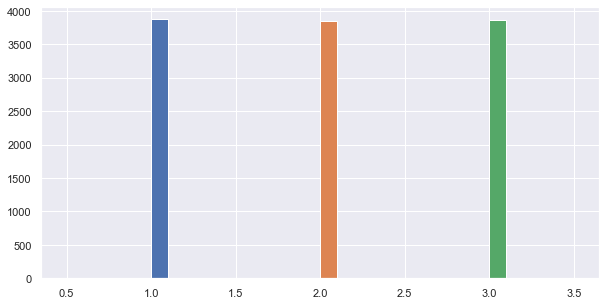

In [225]:
plt.figure(figsize=(10,5))
for i in range(1,4) :
    plt.hist(y[y==i])

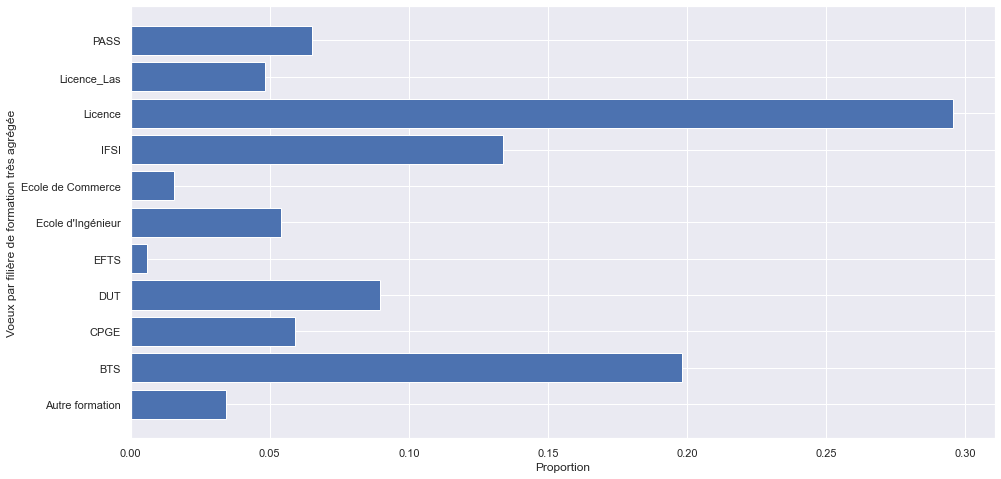

In [161]:

# Voeux par filière de formation très agrégée


fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = list(demande_par_filière.index)
ax.barh(labels,demande_par_filière/demande_par_filière.sum())
plt.xlabel("Proportion")
plt.ylabel("Voeux par filière de formation très agrégée")
plt.legend
plt.show()

In [261]:
demande_par_filière

filière de formation très agrégée
Autre formation       232737
BTS                  1347430
CPGE                  400732
DUT                   610467
EFTS                   39587
Ecole d'Ingénieur     368193
Ecole de Commerce     105412
IFSI                  909686
Licence              2010564
Licence_Las           327952
PASS                  444133
Name: Effectif total des candidats classés par l_établisseme nt en phaseprincipale, dtype: int64

ValueError: Grouper for 'Identifiant del_établissement' not 1-dimensional

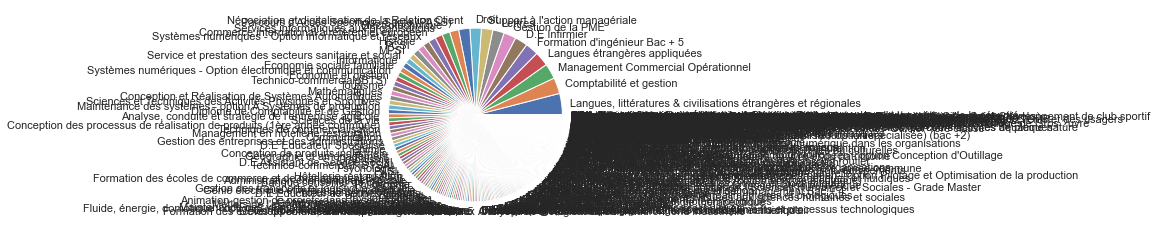

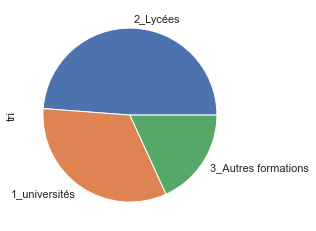

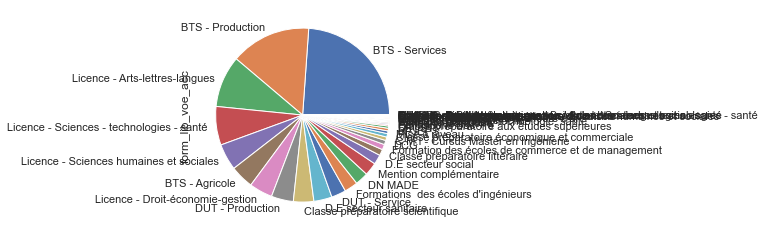

Error in callback <function flush_figures at 0x0000024B39538D30> (for post_execute):


KeyboardInterrupt: 

In [173]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [170]:
df.select_dtypes('object')
df = df.drop(['datasetid', 'recordid', 'record_timestamp','session', 'lien de la formation sur la plateforme parcoursup', 'g_olocalisation_des_formations','geometry.type','geometry.coordinates'], axis=1)

In [24]:
df.head()

,datasetid,recordid,record_timestamp,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,session,form_lib_voe_acc,cod_aff_form,fili,lien_form_psup,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,g_olocalisation_des_formations,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno,geometry.type,geometry.coordinates
0,fr-esr-parcoursup,5ddd4059ccae7206ae2f39b37d08495258e52dff,2021-02-04T13:10:28.998000+00:00,21,19,4,30.769231,Métiers de l'eau,9,1,2_Lycées,0,2020,BTS - Production,23320,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,3.0,La Réunion,6.0,Public,15.38,13.0,1,3,10,38,96,2.0,13.0,92.31,37.0,15,145,140,Lycée de St Paul 4 - BTS - Production - Métier...,9741380G,12.50,974,4.0,0.0,22.0,0.0,6,12,Lycée de St Paul 4,46.153846,3,81.25,2,12,41.0,7.692308,69.23,1,12,12.50,7,90,47,1,12.0,16,La Réunion,2,76.923077,3.0,57,0,13,2,4,0,3.0,15.0,3,8,2,Bacheliers technologiques toutes séries,50,13,5,0.00,15.384615,2.0,81.25,92.31,1,10,23.076923,"[-20.9794, 55.3165]",34.0,53.85,67,0,La Réunion,2,formation selective,3,75.00,81.0,Point,"[55.3165, -20.9794]"
1,fr-esr-parcoursup,a7f51872796481d96bbfcc6cfcc1fd13a8a291c3,2021-02-04T13:10:28.998000+00:00,9,8,3,0.000000,"Analyse, conduite et stratégie de l'entreprise...",0,0,2_Lycées,0,2020,BTS - Agricole,23461,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,2.0,Clermont-Ferrand,0.0,Public,100.00,1.0,0,3,0,2,11,0.0,100.0,0.00,9.0,1,46,31,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,100.00,63,8.0,100.0,2.0,0.0,0,0,AgroSup Dijon Direction Enseignement à Distanc...,0.000000,2,100.00,0,6,4.0,0.000000,0.00,9,0,0.00,0,20,25,3,1.0,1,Auvergne-Rhône-Alpes,0,0.000000,3.0,4,0,2,1,0,1,5.0,20.0,0,3,0,Tous les candidats sauf les Bac technologiques...,23,1,15,0.00,100.000000,1.0,100.00,0.00,5,2,0.000000,"[45.7749, 3.1766]",65.0,0.00,8,1,Puy-de-Dôme,1,formation selective,0,100.00,0.0,Point,"[3.1766, 45.7749]"
2,fr-esr-parcoursup,94819eeabba33cc018ac8925f34d5b6fa795f0cd,2021-02-04T13:10:28.998000+00:00,158,26,28,50.000000,Aménagements paysagers,0,1,2_Lycées,0,2020,BTS - Agricole,23462,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,8.0,Clermont-Ferrand,25.0,Public,50.00,3.0,1,22,0,13,53,4.0,25.0,0.00,40.0,3,455,265,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,25.00,63,21.0,0.0,10.0,0.0,1,0,AgroSup Dijon Direction Enseignement à Distanc...,50.000000,13,75.00,6,24,54.0,50.000000,0.00,114,0,50.00,0,126,117,36,3.0,4,Auvergne-Rhône-Alpes,3,0.000000,25.0,13,0,10,1,1,0,31.0,20.0,2,35,2,Bacheliers technologiques toutes séries,158,2,190,0.00,50.000000,1.0,50.00,0.00,21,9,0.000000,"[45.7749, 3.1766]",46.0,0.00,45,27,Puy-de-Dôme,1,formation selective,0,75.00,50.0,Point,"[3.1766, 45.7749]"
3,fr-esr-parcoursup,119257913ef26bbfcdf0d2c46ab5ad87cc01a73e,2021-02-04T13:10:28.998000+00:00,113,38,61,62.500000,Gestion et protection de la nature,1,3,2_Lycées,1,2020,BTS - Agricole,23464,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,6.0,Clermont-Ferrand,50.0,Public,12.50,18.0,1,42,3,5,45,2.0,25.0,0.00,15.0,18,271,257,AgroSup Dijon Direc

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

In [25]:
## brouillon

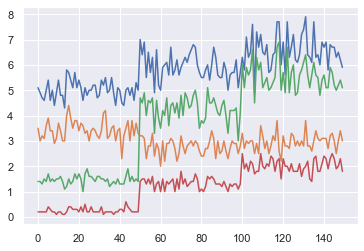

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)

### selection des variables pertinentes
#### Variables presque constantes

In [38]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [48]:
from sklearn.feature_selection import VarianceThreshold

selecteur = VarianceThreshold(threshold=0.2)
selecteur.fit_transform(X)
selecteur.get_support()

#var_1 = df.columns[selecteur.get_support()]

array([ True, False,  True,  True])

on supprime toutes les features qui ont une variance presque nulle

### Test de dependance avec notre variable d'intéret

In [79]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#### Variables qualitatives et y

In [80]:
## Selection des variables dépendantes grace au test du chi2
nb_var_chi2 = (chi2(X,y)[1]<0.05).sum()

chi2_filter = SelectKBest(chi2,nb_var_chi2)
chi2_filter.fit_transform(X,y)
chi2_filter.get_support()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ True, False,  True,  True])

#### Variables quantitatives et y

In [85]:
## Selection des variables dépendantes grace au test ANOVA
nb_var_anova = (f_classif(X,y)[1]<0.05).sum()

anova_filter = SelectKBest(f_classif, k=nb_var_anova)
anova_filter.fit_transform(X,y)

anova_filter.get_support()

array([ True,  True,  True,  True])

array([ True,  True,  True,  True])

In [71]:
#sns.pairplot(df.iloc[:,0:9])

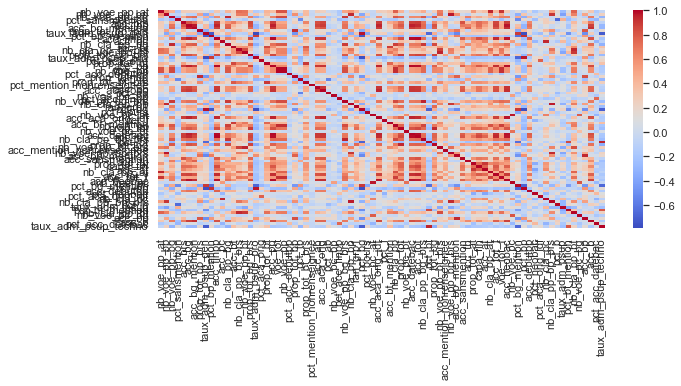

In [72]:
sns.set(rc={'figure.figsize':(10,4)})

df_corr = df.corr()

ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

# III - Modélisation
## III-1 Prétraitement

In [ ]:
# Module pour diviser la base en 2
from sklearn.model_selection import train_test_split

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
trainset['SARS-Cov-2 exam result'].value_counts()

In [ ]:
testset['SARS-Cov-2 exam result'].value_counts()

In [ ]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [ ]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [ ]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [ ]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)

In [ ]:
X_test, y_test = preprocessing(testset)

## Procédure d'évaluation

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

## MODELISATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [ ]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION DU MEILLEUR MODELE

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
SVM

In [ ]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [ ]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

([<matplotlib.patches.Wedge at 0x1c2181baa60>,
 [Text(0.5933372571127745, 0.9262563896254047, '1_universités'),
  Text(-1.0360288169936123, -0.3696542849187825, '2_Lycées'),
  Text(0.870099186606666, -0.6729988153529087, '3_Autres formations')],
 [Text(0.3236385038796951, 0.5052307579774934, '31.87%'),
  Text(-0.5651066274510612, -0.2016296099556995, '47.18%'),
  Text(0.47459955633090867, -0.3670902629197684, '20.96%')])

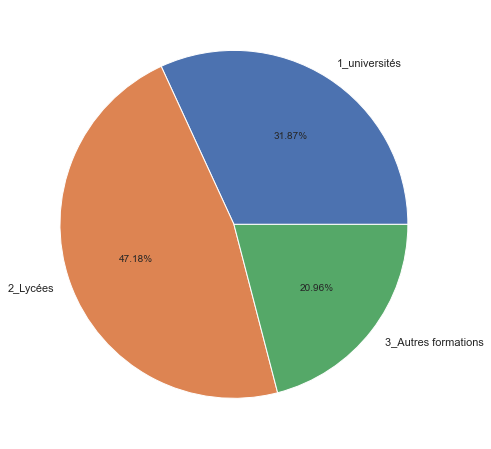

In [39]:
# types des étblissements
fig = plt.figure(figsize=(8,8))

tri = glob_data
tri['eff'] = 1
tri = tri.groupby('tri').sum()

plt.pie(x = tri['eff'],
        labels = list(tri.eff.index),
       autopct= lambda x : str(round(x,2))+"%",
       )

([<matplotlib.patches.Wedge at 0x1c21823c3a0>,
 [Text(1.0906128992016586, 0.14339980507292477, 'Privé enseignement supérieur'),
  Text(1.0577024820101675, 0.302101737084598, 'Privé hors contrat'),
  Text(0.7782003537354096, 0.7774343762955711, "Privé sous contrat d'association"),
  Text(-0.8839918786390341, -0.6546436882001013, 'Public')],
 [Text(0.5948797632009046, 0.0782180754943226, '4.16%'),
  Text(0.5769286265510004, 0.16478276568250796, '0.53%'),
  Text(0.4244729202193143, 0.4240551143430387, '15.6%'),
  Text(-0.482177388348564, -0.3570783753818734, '79.71%')])

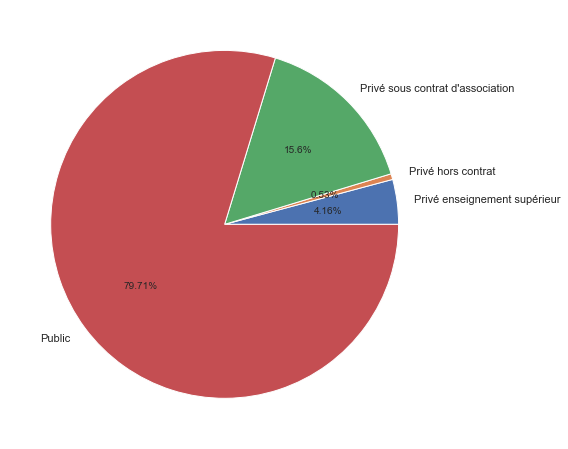

In [40]:
# Statuts des étblissements
fig = plt.figure(figsize=(8,8))
contrat = glob_data
contrat['eff'] = 1
contrat = glob_data.groupby('contrat_etab').sum()
labels = list(contrat.eff.index)
plt.pie(x = contrat['eff'],
        labels=labels,
       autopct= lambda x : str(round(x,2))+"%",
       )

Les établissements demandés par les néo-bacheliers et étudiants en réorientation ou reprise sont pour la plupart publics. En effet, près de 80% de ses établissements ont le status public. Ils sont suivis par les établissements avec le status "Privé sous contrat d'association" (15,6%). Les autres établissements sont en faible proportion avec respectivement 4,16% et 0,53% pour les status "Privé enseignement supérieur" et "Privé hors contrat"

([<matplotlib.patches.Wedge at 0x1c218290790>,
 [Text(0.8615803589508492, 0.683870810219391, 'formation non selec'),
  Text(-0.8615804229794518, -0.6838707295524127, 'formation selective')],
 [Text(0.46995292306409947, 0.3730204419378496, '21.36%'),
  Text(-0.46995295798879183, -0.3730203979376796, '78.64%')])

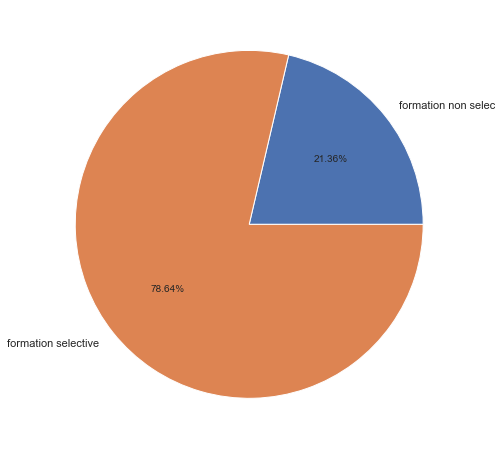

In [41]:
fig = plt.figure(figsize=(8,8))
selectivite = glob_data
selectivite['eff'] = 1
selectivite = selectivite.groupby('select_form').sum()

plt.pie(x = selectivite['eff'],
        labels = list(selectivite.eff.index),
       autopct= lambda x : str(round(x,2))+"%",
       )

sele

In [42]:
sele_tri = glob_data[['select_form','tri']].pivot_table(index='tri',
                                                  columns='select_form', 
                                                  aggfunc=len,margins=True,
                                                  margins_name="Total")
sele_tri.reset_index(inplace=True)

In [43]:
sele_tri

select_form,tri,formation non selec,formation selective,Total
0,1_universités,2725.0,1341.0,4066
1,2_Lycées,NaN,6020.0,6020
2,3_Autres formations,NaN,2674.0,2674
3,Total,2725.0,10035.0,12760


In [44]:
sele_tri = pd.melt(sele_tri,id_vars="tri", value_vars=['formation non selec','formation selective'], var_name ='selectivite',value_name = "effectif")


In [45]:
sele_tri

,tri,selectivite,effectif
0,1_universités,formation non selec,2725.0
1,2_Lycées,formation non selec,NaN
2,3_Autres formations,formation non selec,NaN
3,Total,formation non selec,2725.0
4,1_universités,formation selective,1341.0
5,2_Lycées,formation selective,6020.0
6,3_Autres formations,formation selective,2674.0
7,Total,formation selective,10035.0


<AxesSubplot:xlabel='tri', ylabel='effectif'>

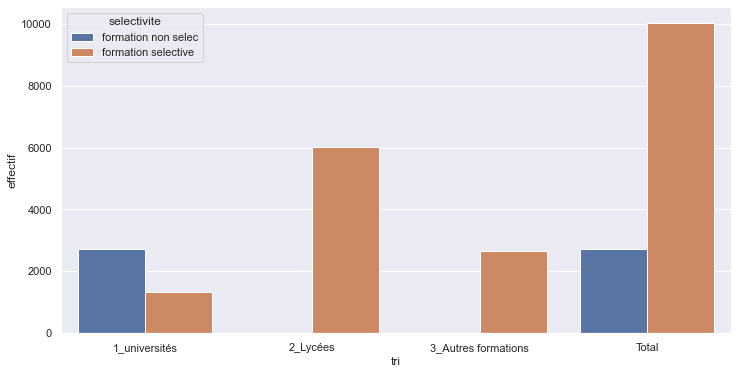

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=sele_tri["tri"],y=sele_tri["effectif"],hue = sele_tri["selectivite"])

In [47]:
contr_tri = glob_data[['contrat_etab','tri']].pivot_table(index='tri',
                                                   columns='contrat_etab',
                                                   aggfunc=len,margins=True,
                                                   margins_name="Total")
contr_tri

contrat_etab,Privé enseignement supérieur,Privé hors contrat,Privé sous contrat d'association,Public,Total
tri,,,,,
1_universités,182,1,2,3881,4066
2_Lycées,27,30,1396,4567,6020
3_Autres formations,322,37,592,1723,2674
Total,531,68,1990,10171,12760


###### Filière de formation très agrégée

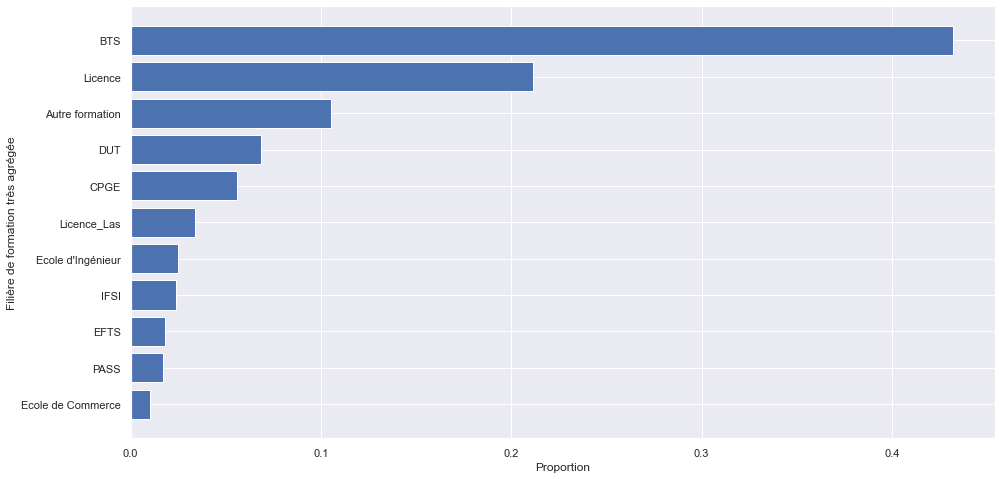

In [136]:
# Filière de formation très agrégée

fili = df['filière de formation très agrégée'].value_counts(ascending=True, normalize=True)

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = list(fili.index)
ax.barh(labels,fili)
plt.xlabel("Proportion")
plt.ylabel("Filière de formation très agrégée")
plt.legend
plt.show()

## MODELISATION BAMOUNI

In [72]:
df_model = df
df_model.sample(2)

,datasetid,recordid,record_timestamp,Effectif des autres candidats en phaseprincipale,Effectif des candidats néo bacheliers en terminalepro en phase principale,Effectif des candidats en terminale générale en phase principale,% d_admis néo bacheliers sans mention au bac,fil_lib_voe_acc,dont effectif des admis boursiers néo bacheliers,Effectif des admis néo bacheliers généraux,tri,Effectif des admis néo bacheliers généraux ayant eu une mention au bac,session,form_lib_voe_acc,cod_aff_form,filière de formation très agrégée,lien de la formation sur la plateforme parcoursup,dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d_admission de la part de l_établissement,académie de l_établissement,taux_adm_psup_gen,"statut de l_établisseme nt de la filière de formation(public, privé…)",dont % d_admis avec mention,Rang du dernier appelé du groupe 3,dont effectif des admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet),Effectif des admis en phase complémentaire,Effectif des candidats en terminale générale classés parl_établisseme nt,Effectif des admis néo bacheliers technologiques,dont effectif des candidats boursiers en terminale technologiqu e classés par l_établissement,Effectif des candidats néo en terminale technologique en phase principale,dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d_admission de la part de l_établissement,taux_adm_psup_pro,% d_admis néo bacheliers issus de la même académie,Effectif des candidats en terminale technologiqu e ayant reçu une propositiond_admission,Effectif des admis en phase principale,Effectif total des candidatspour une formation,Effectif total des candidats en phaseprincipale,filière de formation détaillée,Identifiant del_établissement,% d_admis ayant reçu leur proposition d_admission le 15 mai (ouverturepp),code département al del_établisseme nt,Effectif des candidats en terminale professionne lle ayant reçu une proposition d_admission de la part del_établisseme nt,% d_admis néo bacheliers avec mention Très Bien au bac,dont effectif des candidats boursiers en terminale technologiqu e ayant reçu une proposition d_admission de la part del_établisseme nt,% d_admis néo bacheliers issus du même établissemen t (BTs/cpgE),% d_admis néo bacheliers sans information sur la mention au bac,dont effectif des admis néo bacheliers avec mention assez Bien au bac,dont effectif des admis néo bacheliers issus de la même académie,Identifiant del_établissement,% d_admis néo bacheliers avec mention assez Bien au bac,Effectif des candidats en terminale pro en phase complémentaire,% d_admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet),dont effectif des candidats boursiers en terminale générale en phase principale,Effectif des candidats en terminale pro classés par l_établissement,Rang du dernier appelé du groupe 1,% d_admis néo bacheliers généraux,% d_admis néo bacheliers boursiers,Effectifs des autres candidats en phase complémentaire,dont effectif des admis néo bacheliers issus de la même académie (paris/crétei l/versailles réunies),% ayant accepté selon le sexe.,Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac,Effectif total des candidats classés par l_établisseme nt en phaseprincipale,dont effectif des admis néo bacheliers issus du même établissemen t (BTs/cpgE),Effectif total des candidats ayant reçu une proposition d_admission de la part del_établisseme nt,Effectif des candidats en terminale technologiqu e en phase complémentaire,dont effectif des admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin),Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis),Région de l_établissement,dont effectif des candidats boursiers en terminale générale classés par l_établissement,% d_admis néo bacheliers technologiques,Effectif des candidats en terminale générale

In [80]:
df_model_f = df_model[['Effectif des autres candidats en phaseprincipale',
               '% d_admis néo bacheliers sans mention au bac', 
               'fil_lib_voe_acc',
               'filière de formation très agrégée',
               'académie de l_établissement',
               'statut de l_établisseme nt de la filière de formation(public, privé…)',
               'dont % d_admis avec mention',
               'Effectif des admis en phase complémentaire',
               'Effectif des admis en phase principale',
               'Effectif total des candidatspour une formation',
               'Identifiant del_établissement',
               '% d_admis néo bacheliers avec mention Très Bien au bac',
               'dont effectif des admis néo bacheliers avec mention assez Bien au bac',
               '% d_admis néo bacheliers avec mention assez Bien au bac',
               'dont effectif des candidats boursiers en terminale générale en phase principale',
               '% d_admis néo bacheliers boursiers',
               'Effectif total des candidats classés par l_établisseme nt en phaseprincipale',
               'dont effectif des candidats boursiers en terminale générale classés par l_établissement',
               'Région de l_établissement',
               'Effectif des admis néobacheliers',
               '% d_admis néobacheliers',
               '% d_admis néo bacheliers avec mention Bien au bac',
               'taux_adm_psup',
               'département de l_établissement']]

In [166]:
pip install pycaret --user

  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached lightgbm-3.3.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached spacy-2.3.7-cp39-cp39-win_amd64.whl (9.4 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Using cached mlflow-1.22.0-py3-none-any.whl (15.5 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel me

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' 'C:\Users\Asus ZenBook\AppData\Local\Temp\pip-standalone-pip-omr4daic\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Asus ZenBook\AppData\Local\Temp\pip-build-env-59wfbpbe\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3

  Using cached Cython-0.29.23-cp39-cp39-win_amd64.whl (1.7 MB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached databricks_cli-0.16.2-py3-none-any.whl
  Using cached waitress-2.0.0-py3-none-any.whl (56 kB)
  Using cached GitPython-3.1.24-py3-none-any.whl (180 kB)
  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached prometheus_flask_exporter-0.18.7-py3-none-any.whl (17 kB)
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
  Using cached alembic-1.4.1-py2.py3-none-any.whl
  Using cached docker-5.0.3-py2.py3-none-any.whl (146 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
  Using cached Mako-1.1.6-py2.py3-none-any.whl (75 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached websocket_client-1.2.3-py3-none-any.whl (53 kB)
  Using cached pywin32-227-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 k

  
    blis_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries blis not found in ['C:\\ProgramData\\Anaconda3\\lib', 'C:\\', 'C:\\ProgramData\\Anaconda3\\libs']
      NOT AVAILABLE
  
    openblas_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries openblas not found in ['C:\\ProgramData\\Anaconda3\\lib', 'C:\\', 'C:\\ProgramData\\Anaconda3\\libs']
    get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
    customize GnuFCompiler
    Could not locate executable g77
    Could not locate executable f77
    customize IntelVisualFCompiler
    Could not locate executable ifort
    Could not locate executabl


  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.5-cp39-cp39-win_amd64.whl (6.6 MB)
  Using cached murmurhash-1.0.6-cp39-cp39-win_amd64.whl (21 kB)
  Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
  Using cached srsly-2.4.2-cp39-cp39-win_amd64.whl (451 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached pynndescent-0.5.5-py3-none-any.whl
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


In [167]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
## ANALYSE DE L'EXCELLENCE DE L'ETABLISSEMENT (%de mention au bac)

# BROUILLON

In [ ]:
columns_names = pd.json_normalize(req.json()['facet_groups'][:])

In [ ]:
columns_names = list(ses_2020.columns)
columns_names1 = [c.replace('fields.', '') for c in columns_names ]

In [ ]:
dic=dict()
for i in range(len(columns_names)) :
    dic[columns_names[i]] = columns_names1[i]
ses_2020.rename(dic)